In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

# 自訂 function 可重新 reload
from importlib import reload
from utils import util_inference_result
reload(util_inference_result)
from utils.util_inference_result import *


# Functions

In [14]:
def CR_barchart_compare(original_values, adjusted_values2, 
                        figure_title = "Comparing Prediction Interval Coverage: Original vs. Adjusted"):
    """
    original_values: array, shape = (24,)
    adjusted_values2: array, shape = (24,)
    """
    X_axis = np.arange(len(original_values)) 

    plt.figure(figsize=(20, 8)) 
    plt.rcParams['font.size'] = 14# 設置繪圖時的字體大小
    plt.bar(X_axis - 0.2, original_values, 0.4, label = 'Original') 
    plt.bar(X_axis + 0.2, adjusted_values2, 0.4, label = 'Adjusted') 

    for i in X_axis:
        plt.text(X_axis[i] - 0.2, original_values[i] + 0.01, str(round(original_values[i],2)), ha='center', va='bottom')
        plt.text(X_axis[i] + 0.2, adjusted_values2[i] + 0.01, str(round(adjusted_values2[i],3)), ha='center', va='bottom')

    plt.ylim(0, 1.1)
    plt.xlabel("Hours") 
    plt.ylabel("") 
    plt.title(figure_title) 
    plt.legend(loc = 'lower right') 
    plt.show() 

def err_boxplot(error_data, 
                figure_title = 'Boxplot of the absolute error'):
    """
    input:
        error_data is an array, shape: (# of obs, channel = 1, # of length)
    output: boxplot with  # of boxes = # of length, # of points of each boxes = # of obs
    """

    data_to_plot = np.squeeze(abs_err_I2) # reduce the channel dimension
    box_data = data_to_plot.T.tolist()
    # box_data is a list containing lists. 
    # The number of elements in the 1st level list represents the number of boxes.
    # The number  of elements in the 2nd level list represent the number of points of one box

    plt.figure(figsize=(10, 6))
    plt.boxplot(box_data) 
    plt.xlabel("Hours")
    plt.ylabel("Values")
    plt.title("Boxplot of the absolute error of the I2 dataset")
    plt.grid(True)
    plt.ylim((0,2))
    plt.show()

def prediction_linechart(obs, y, y_predict):
    """
    input: 
        one_obs: specify a number from the size of data (ie specify which series should plot)
        y: data values, an array, shape = (obs, channel, length = 192)
        y_predict: prediciton, an array, shape = (obs, channel, length = 24)
    """
    date = generate_date_from_seq(obs)
    
    x = range(0,true_data_test_all.shape[2])
    x_predict = range(true_data_test_all.shape[2]-pred_mean_test.shape[2], true_data_test_all.shape[2])
    
    y = true_data_test_all[obs,0,:]
    y_predict = pred_mean_test[obs,0,:]

    plt.figure(figsize=(16, 4)) 
    plt.plot(x, y, color = 'tab:gray', label = "Data")
    plt.plot(x_predict, y_predict, color = 'tab:blue', label = "Prediction")
    plt.title("" + date)
    # plt.xticks(rotation=45) 
    plt.ylim(-2.5, 2.5) 
    plt.legend(loc = "upper left")
    plt.show()

def PI_linechart(obs,y, L, U, figure_title = "Prediction interval"):
    """
    input: 
        one_obs: specify a number from the size of data (ie specify which series should plot)
        y: data values, an array, shape = (obs, channel, length = 192)
        L: lower bound of PI, an array, shape = (obs, channel, length = 24)
        U: upper bound of PI, an array, shape = (obs, channel, length = 24)
    """    
    date = generate_date_from_seq(obs)
    
    x = range(0,true_data_test_all.shape[2])
    x_predict = range(true_data_test_all.shape[2]-pred_mean_test.shape[2], true_data_test_all.shape[2])

    y = true_data_test_all[obs,0,:]
    lower = L[obs,0,:]
    upper = U[obs,0,:]

    plt.figure(figsize=(16, 4)) 
    plt.plot(x, y, color = 'tab:gray', label = "Data")
    plt.title(figure_title +' ('+date+')')

    # plt.xticks(rotation=45) 
    plt.fill_between(x_predict, lower, upper, color='tab:blue', alpha=0.4, label = "PI")
    plt.ylim(-2.5, 2.5) 
    plt.legend(loc = "upper left")
    plt.show()    

# CPI

## Read data: I2 and test data

In [168]:
main_folder_path = "/home/ytfan.st/NA/"
sub_folder_path = "SSSD_CP/src/results/NYISO_4/NYISO_4_NYC_split/T200_beta00.0001_betaT0.02/"

# I2 dataset
folder_path = main_folder_path + sub_folder_path + "imputaiton_multiple_20k_I2_part"
pred_data_I2 = np.vstack([read_multiple_imputations(folder_path + str(i) +'/', 24) for i in range(3)])
true_data_I2 = read_missing_k_data(main_folder_path+sub_folder_path, npy_file="imputaiton_multiple_20k_I2_part0/original0.npy", missing_k = 24)

print(f"pred_data_I2, shape: {pred_data_I2.shape}")
print(f"true_data_I2, shape: {true_data_I2.shape}")

# test dataset
folder_path = main_folder_path + sub_folder_path + "imputaiton_multiple_20k_test/"
# folder_path = main_folder_path + sub_folder_path + "imputaiton_multiple_20k_test_dataset6/"

pred_data_test = read_multiple_imputations(folder_path, 24)
true_data_test = read_missing_k_data(folder_path, npy_file="original0.npy", missing_k = 24)

print(f"pred_data_test, shape: {pred_data_test.shape}")
print(f"true_data_test, shape: {true_data_test.shape}")


true_data_test_all = read_missing_k_data(folder_path, npy_file="original0.npy", missing_k = 192)
print(f"true_data_test_all, shape: {true_data_test_all.shape}")



pred_data_I2, shape: (50, 2061, 1, 24)
true_data_I2, shape: (2061, 1, 24)
pred_data_test, shape: (50, 73, 1, 24)
true_data_test, shape: (73, 1, 24)
true_data_test_all, shape: (73, 1, 192)


## Method 1

### Compute E*

In [127]:
pred_data = pred_data_I2
true_data = true_data_I2

L, U = pred_interval(pred_data, beta = 0.05)
E_star = compute_E_star(L, U, true_data, alpha = 0.05)
print(E_star)

[[0.05384744 0.09172456 0.11642269 0.1337135  0.15249845 0.18523767
  0.26519733 0.33959874 0.38149975 0.44327589 0.49378806 0.54925142
  0.60272065 0.63706733 0.65506702 0.6959861  0.70043324 0.70143393
  0.67124151 0.64539969 0.63114435 0.63184822 0.62629912 0.58751514]]


### Adjust PI of I2 and compare CR

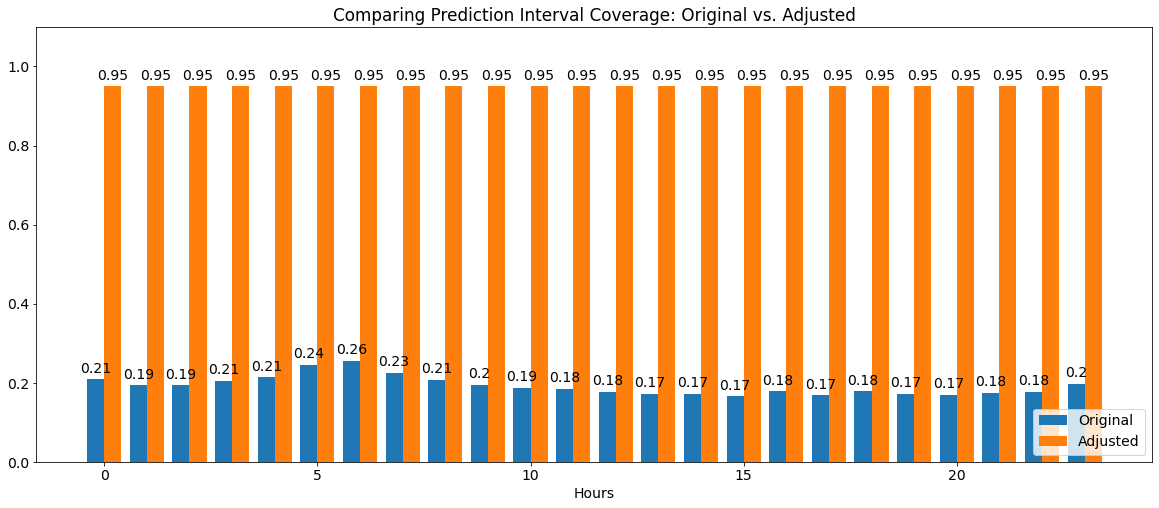

In [128]:
L, U = pred_interval(pred_data, beta = 0.05)
L_star, U_star = adjust_PI(L, U, E_star)
I2_CR_original = coverage_rate(L, U, true_data)
I2_CR_adjust = coverage_rate(L_star, U_star, true_data)

CR_barchart_compare(I2_CR_original[0], I2_CR_adjust[0])

### Adjust PI of test data and compare CR

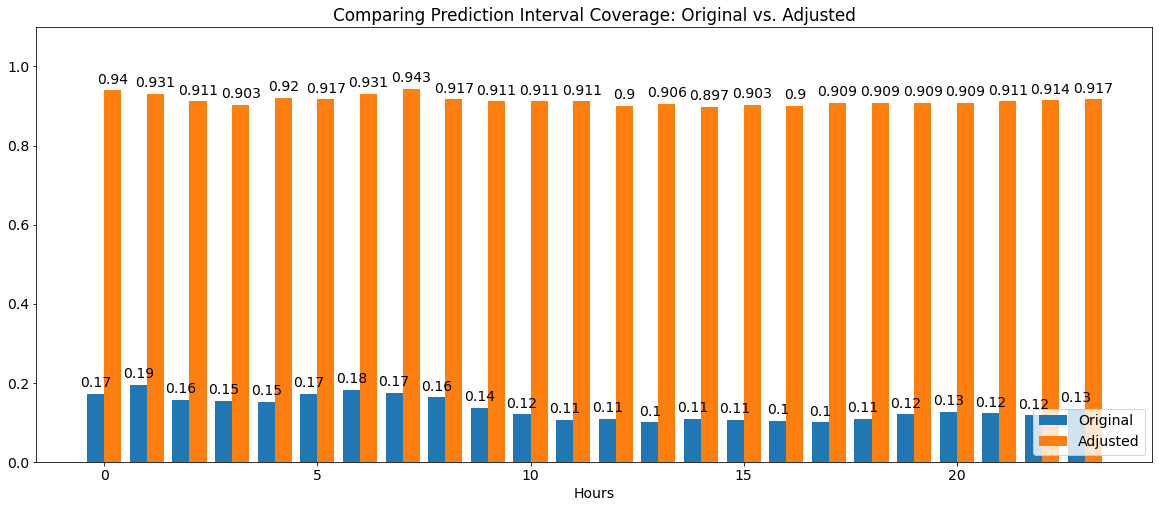

In [129]:
L, U = pred_interval(pred_data_test, beta = 0.05)
L_star, U_star = adjust_PI(L, U, E_star)

test_CR_original = coverage_rate(L, U, true_data_test)
test_CR_adjust = coverage_rate(L_star, U_star, true_data_test)

CR_barchart_compare(test_CR_original[0], test_CR_adjust[0])

### Plot PI

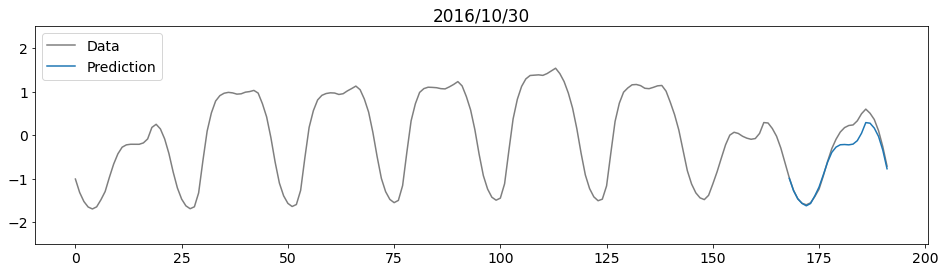

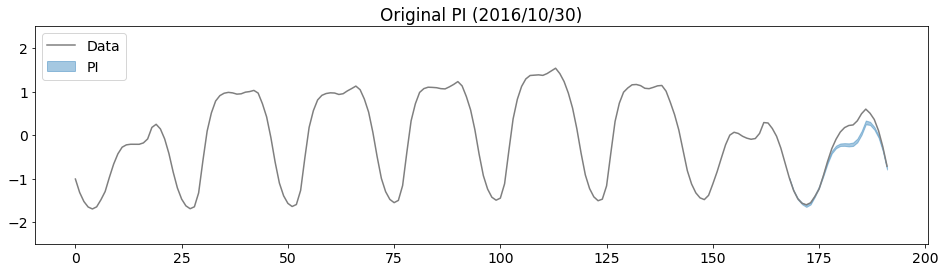

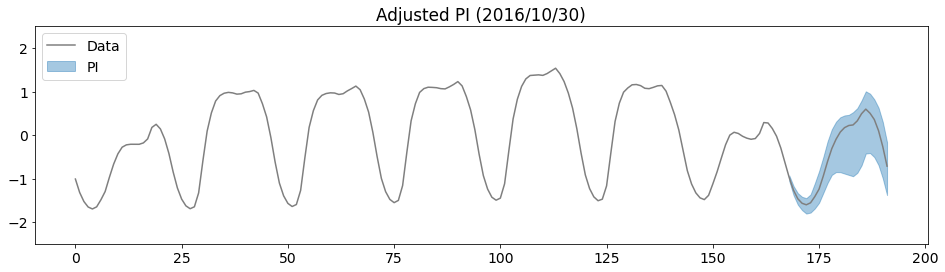

In [44]:
pred_mean_I2 = np.mean(pred_data_I2, axis = 0)
pred_mean_test = np.mean(pred_data_test,axis=0)


one_obs = 10
prediction_linechart(one_obs, true_data_test_all, pred_mean_test)
PI_linechart(one_obs, true_data_test_all, L, U, figure_title = "Original PI")
PI_linechart(one_obs, true_data_test_all, L_star, U_star, figure_title = "Adjusted PI")


## Method 2: separate

### Compute E*

In [169]:
pred_data = pred_data_I2
true_data = true_data_I2

L, U = pred_interval(pred_data, beta = 0.05)

E_star_L, E_star_U = compute_E_star_separate(L, U, true_data, alpha = 0.05)
print(f'E_star_L: {E_star_L}, E_star_U: {E_star_U}')


E_star_L: [[0.05241082 0.08929132 0.11321031 0.13081747 0.1399922  0.16696327
  0.20156757 0.24338706 0.25306518 0.26690875 0.29922862 0.31705378
  0.32406155 0.34521967 0.37573464 0.39123941 0.39900094 0.41232958
  0.37934928 0.36266576 0.3673904  0.38261313 0.36881217 0.36294415]], E_star_U: [[0.01415802 0.02021635 0.02581357 0.03538417 0.04975605 0.08721736
  0.1429149  0.21484617 0.27015873 0.32427788 0.38600144 0.4509911
  0.49314784 0.53604436 0.57284027 0.58574251 0.59837519 0.5808202
  0.56095247 0.53569922 0.52488664 0.50719586 0.48865678 0.44787921]]


### Adjust PI of I2

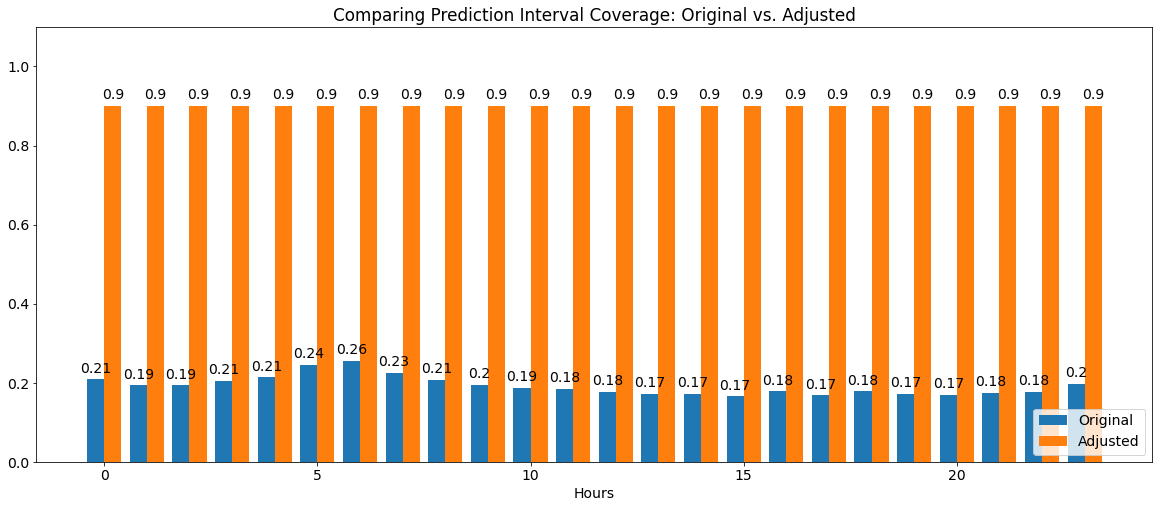

In [170]:
L, U = pred_interval(pred_data, beta = 0.05)
L_star, U_star = adjust_PI_separate(L, U, E_star_L, E_star_U)

# print(f'I2 CR: {coverage_rate(L, U, true_data)}')
# print(f'I2 adjusted CR: {coverage_rate(L_star, U_star, true_data)}')

I2_CR_original = coverage_rate(L, U, true_data)
I2_CR_adjust = coverage_rate(L_star, U_star, true_data)

CR_barchart_compare(I2_CR_original[0], I2_CR_adjust[0])

### Adjust PI of test data

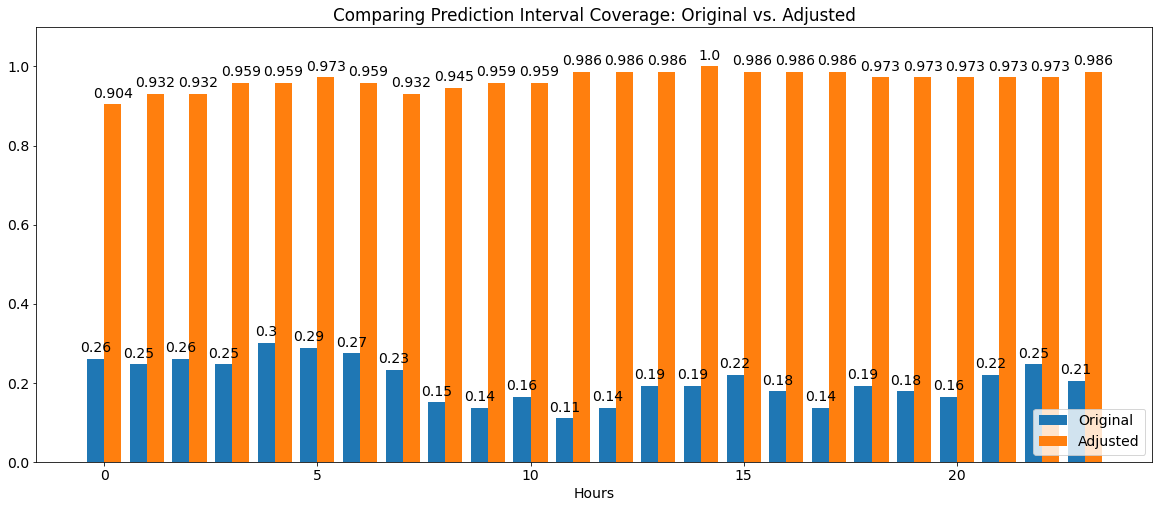

In [171]:
L, U = pred_interval(pred_data_test, beta = 0.05)
L_star, U_star = adjust_PI_separate(L, U, E_star_L, E_star_U)

test_CR_original = coverage_rate(L, U, true_data_test)
test_CR_adjust = coverage_rate(L_star, U_star, true_data_test)

CR_barchart_compare(test_CR_original[0], test_CR_adjust[0])

### Plot PI

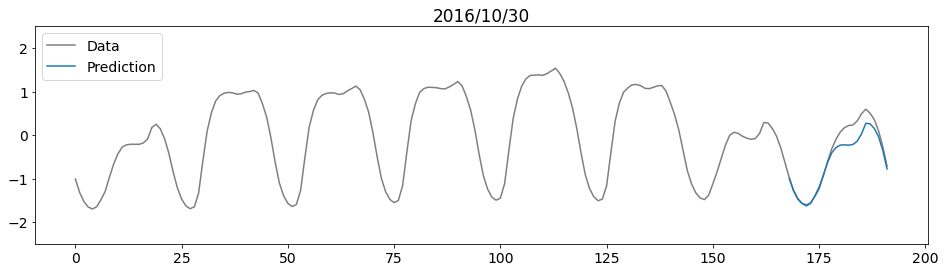

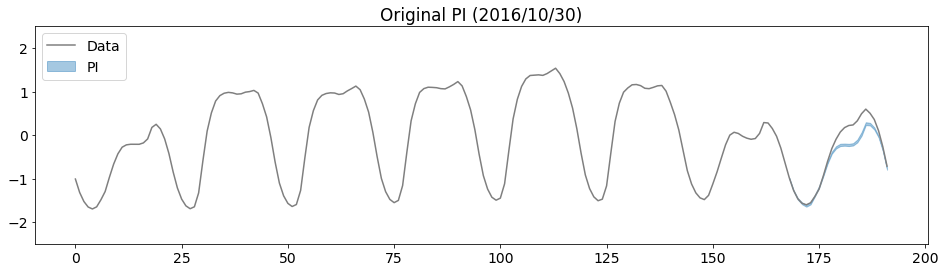

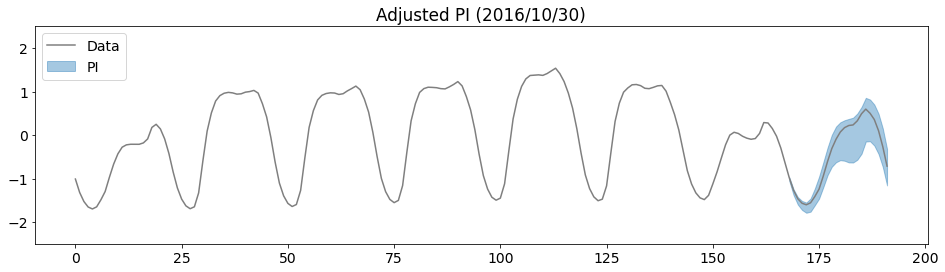

In [133]:
pred_mean_I2 = np.mean(pred_data_I2, axis = 0)
pred_mean_test = np.mean(pred_data_test,axis=0)


one_obs = 10
prediction_linechart(one_obs, true_data_test_all, pred_mean_test)
PI_linechart(one_obs, true_data_test_all, L, U, figure_title = "Original PI")
PI_linechart(one_obs, true_data_test_all, L_star, U_star, figure_title = "Adjusted PI")


# Issue: can method 2 improve MAPE?

Use the center of balibrated conformalized prediction interval from method 2 as prediction. 

2024.07.01

In [172]:
# prediction of test data (pred_data_test)
pred_mean = np.mean(pred_data_test, axis = 0)
pred_median = np.median(pred_data_test, axis = 0)
print(pred_mean.shape)


# test data
main_folder = '/home/ytfan.st/NA/SSSD_CP/src/'
result_folder = 'results/NYISO_4/NYISO_4_NYC_split/T200_beta00.0001_betaT0.02/imputaiton_multiple_20k_test/'
dataset_folder = 'datasets/NYISO/dataset_4/zone/'
dataset_filename = 'N.Y.C._test.npy'

# main_folder = '/home/ytfan.st/NA/SSSD_CP/src/'
# result_folder = 'results/NYISO_4/NYISO_4_NYC_split/T200_beta00.0001_betaT0.02/imputaiton_multiple_20k_test_dataset6'
# dataset_folder = 'datasets/NYISO/dataset_6/zone/'
# dataset_filename = 'N.Y.C._test.npy'


## test data in std scale
file_path = os.path.join(main_folder + result_folder, 'original0.npy')
true_data = np.load(file_path)
print(true_data.shape)
true_data_target = true_data[:,:,-24:]
print(true_data_target.shape)

## test data in original scale
file_path = os.path.join(main_folder + dataset_folder, dataset_filename)
true_data_o = np.swapaxes(np.load(file_path), axis1=1, axis2=2)
print(true_data_o.shape)

true_data_o_cond = true_data_o[:,:,0:168]
print(true_data_o_cond.shape)
true_data_o_target = true_data_o[:,:,-24:]
print(true_data_o_target.shape)

(73, 1, 24)
(73, 1, 192)
(73, 1, 24)
(73, 1, 192)
(73, 1, 168)
(73, 1, 24)


In [173]:
m = np.mean(true_data_o_cond, axis=2).reshape((pred_mean.shape[0], pred_mean.shape[1], 1))
s = np.std(true_data_o_cond, axis=2).reshape((pred_mean.shape[0], pred_mean.shape[1], 1))

pred_mean_o = pred_mean*s + m
pred_medain_o = pred_median*s + m

print(pred_mean_o.shape)

print(f'median MAPE: {round(np.mean(abs((true_data_o_target - pred_medain_o))/true_data_o_target)*100,4)}')
print(f'MAPE: {round(np.mean(abs((true_data_o_target - pred_mean_o))/true_data_o_target)*100,4)}')
print(f'MSE: {round(np.mean(np.square(true_data_target - pred_mean))*1,4)}')

(73, 1, 24)
median MAPE: 1.6407
MAPE: 1.639
MSE: 0.0261


In [174]:
# new pred_mean

pred_mean_calibrated = (L_star + U_star)/2 # L_star & U_star are from Method 2

pred_mean_o = pred_mean_calibrated*s + m
pred_medain_o = pred_mean_calibrated*s + m

print(pred_mean_o.shape)

print(f'median MAPE: {round(np.mean(abs((true_data_o_target - pred_medain_o))/true_data_o_target)*100,4)}')
print(f'MAPE: {round(np.mean(abs((true_data_o_target - pred_mean_o))/true_data_o_target)*100,4)}')
print(f'MSE: {round(np.mean(np.square(true_data_target - pred_mean_calibrated))*1,4)}')

(73, 1, 24)
median MAPE: 1.6646
MAPE: 1.6646
MSE: 0.0266


In [48]:
# round(np.mean(np.square(pred_mean - pred_mean_calibrated))*1,4)
print(pred_mean[0,:,:])
print(pred_mean_calibrated[0,:,:])
print(true_data_target[0,:,:])

[[-0.38804752 -0.6383529  -0.7898616  -0.87149656 -0.8637223  -0.6357485
  -0.06102543  0.4872911   0.8439997   1.1117991   1.2688524   1.370648
   1.4363345   1.5045826   1.5245723   1.5508128   1.5338815   1.4371959
   1.2522755   1.0920352   0.8281538   0.5369757   0.19101696 -0.23332025]]
[[-0.40613605 -0.66981905 -0.83264634 -0.91728983 -0.9072269  -0.66955302
  -0.08630946  0.47303375  0.85054065  1.13852303  1.30884387  1.43489592
   1.52198533  1.6043763   1.63056691  1.65448228  1.64234792  1.52764783
   1.35112884  1.17838339  0.90149239  0.59418097  0.24805023 -0.19243053]]
[[-0.4139396  -0.7113596  -0.8918083  -0.9889077  -0.9891903  -0.7948972
  -0.23593964  0.26472056  0.5986824   0.8452453   0.99894685  1.0763627
   1.1144114   1.1366378   1.1295743   1.159241    1.2056717   1.2232833
   1.1233585   0.9518569   0.7471099   0.5107184   0.18024121 -0.1771714 ]]


<ipython-input-66-157f349fd42f>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 6))


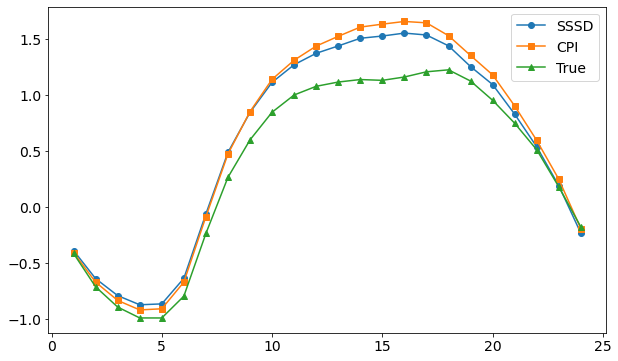

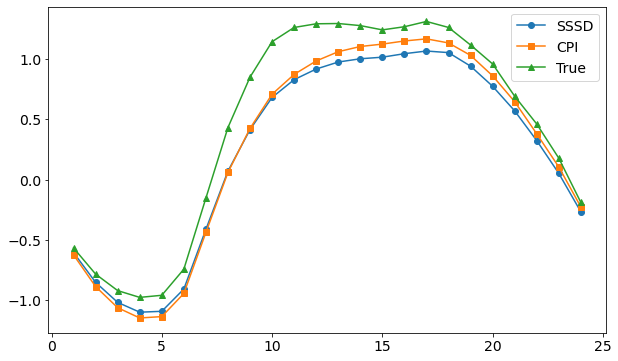

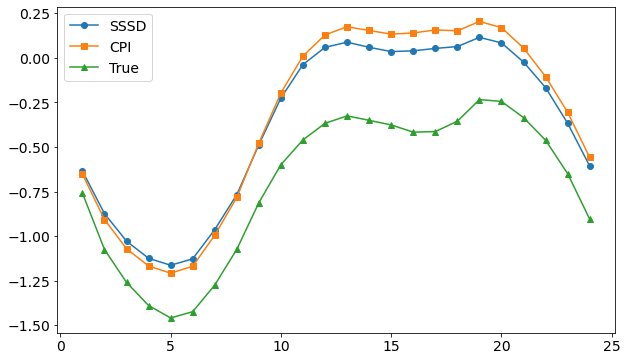

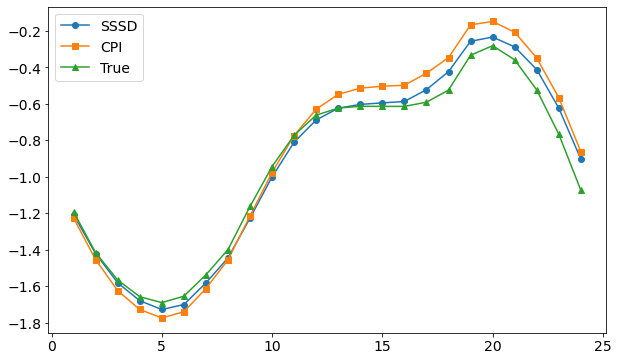

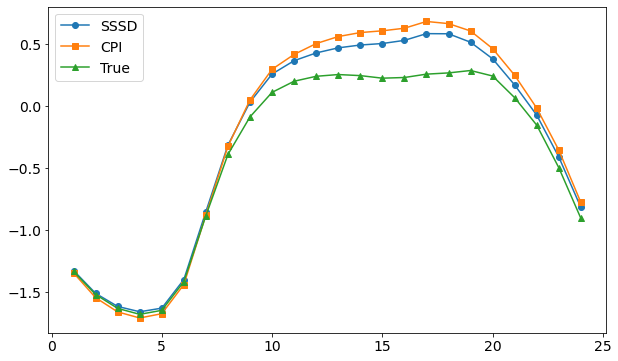

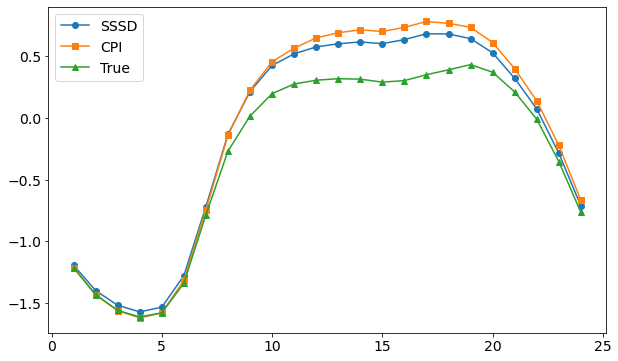

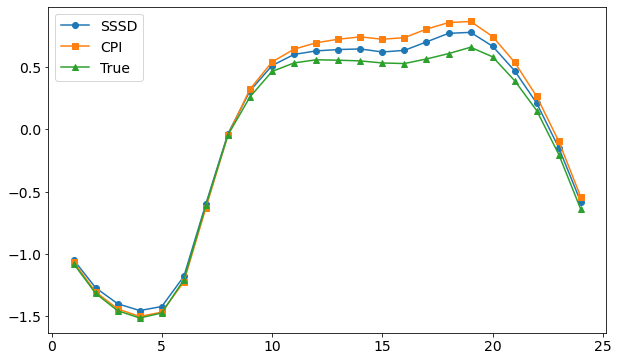

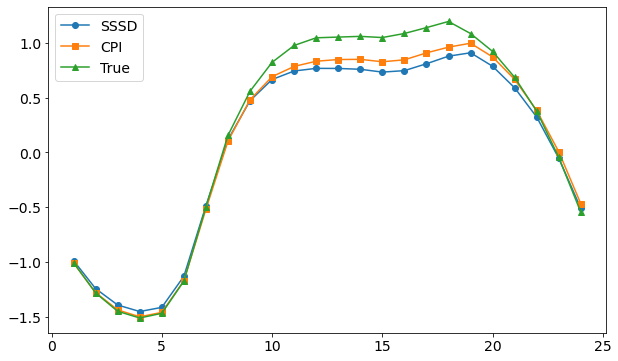

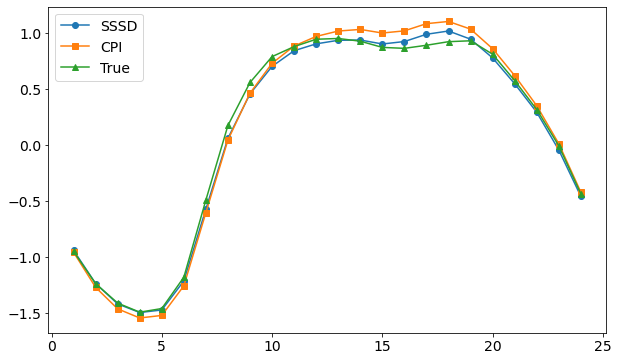

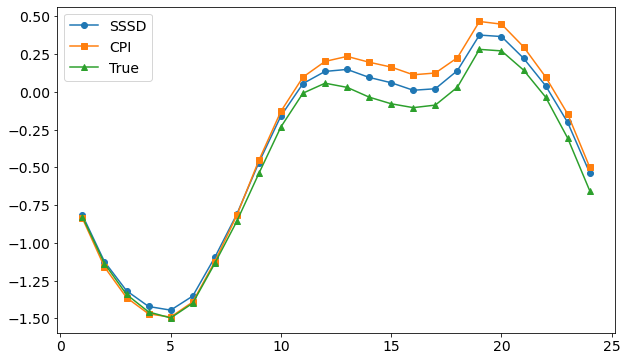

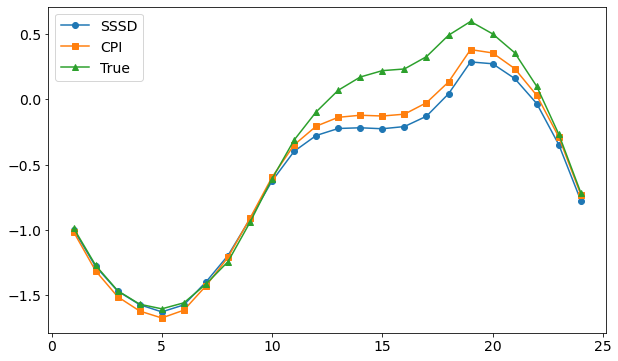

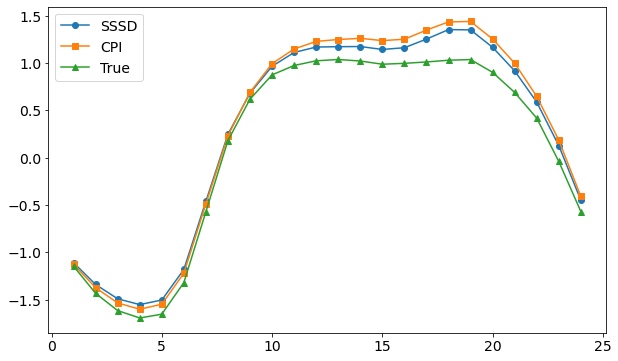

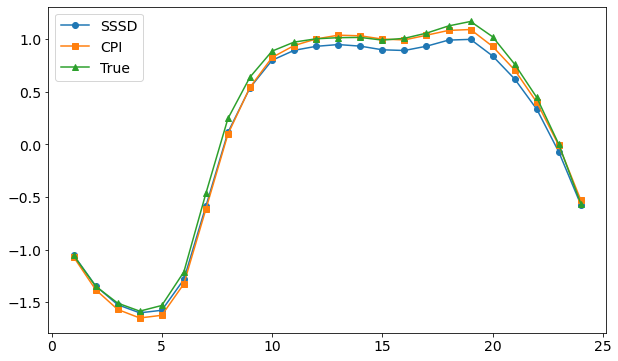

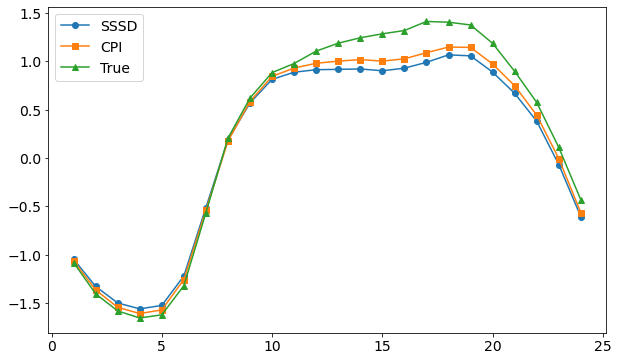

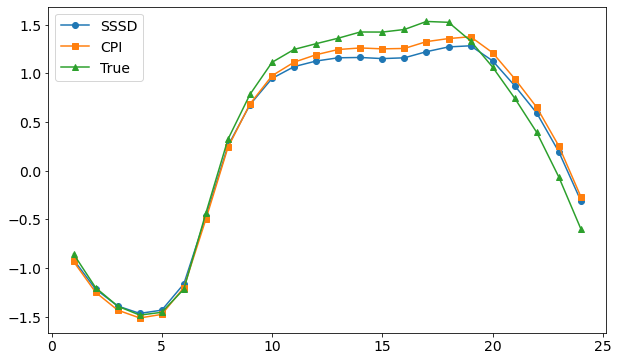

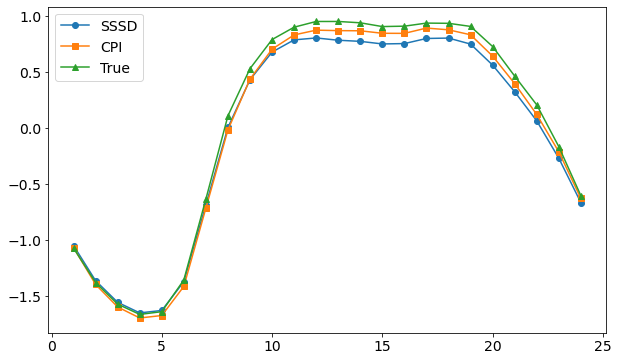

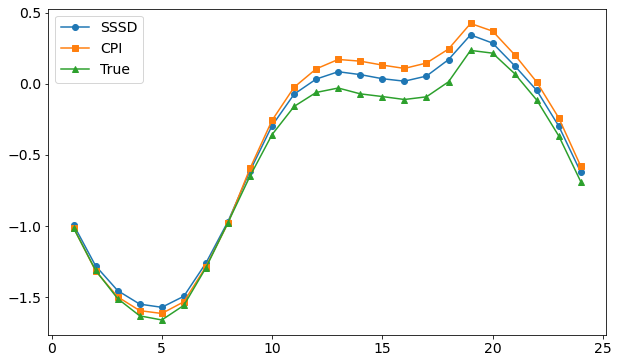

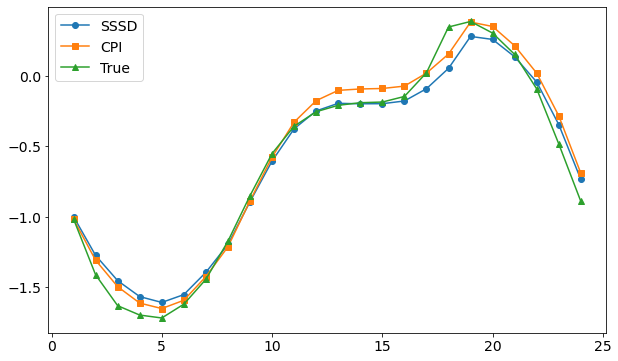

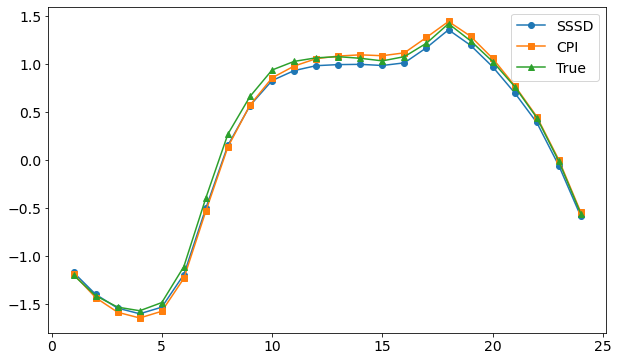

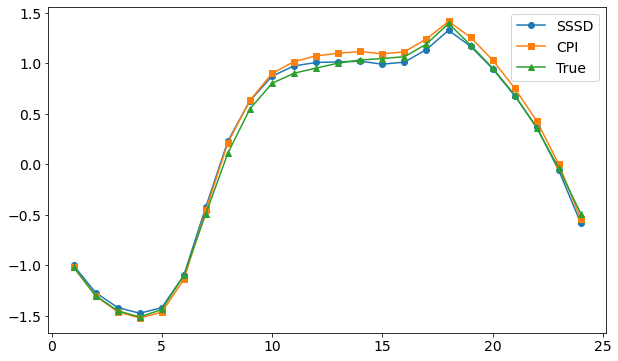

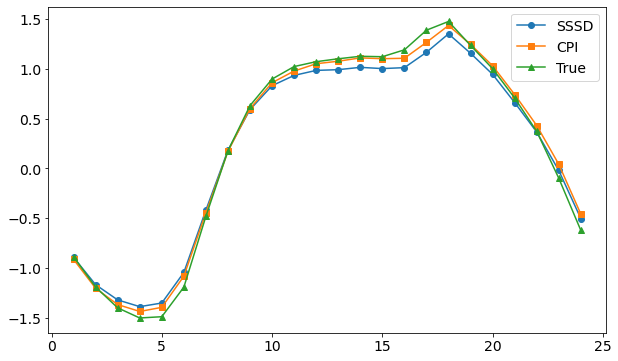

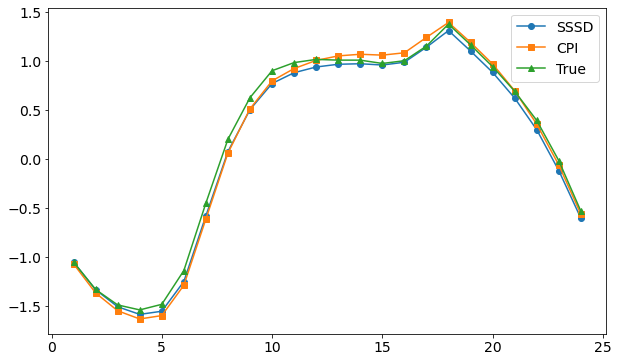

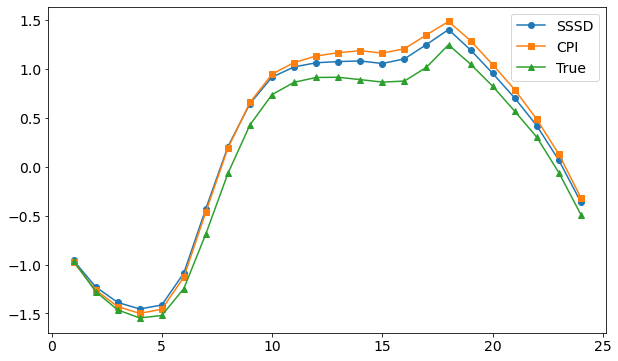

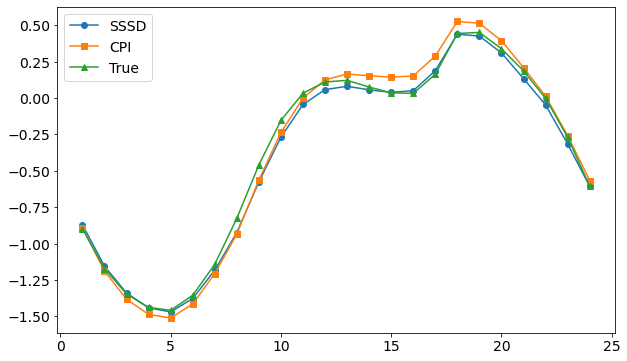

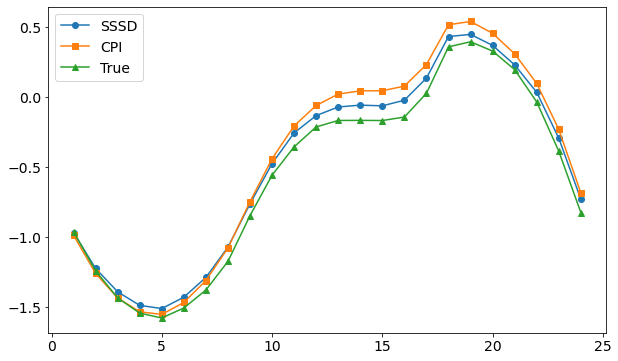

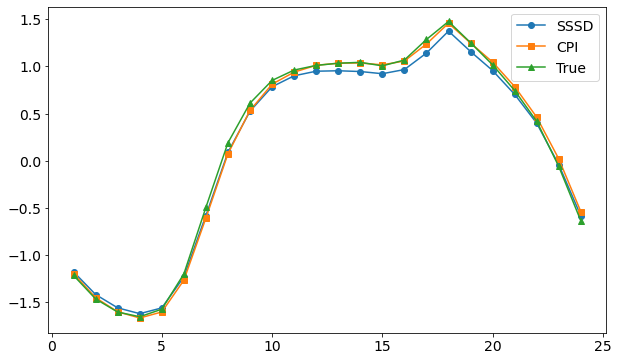

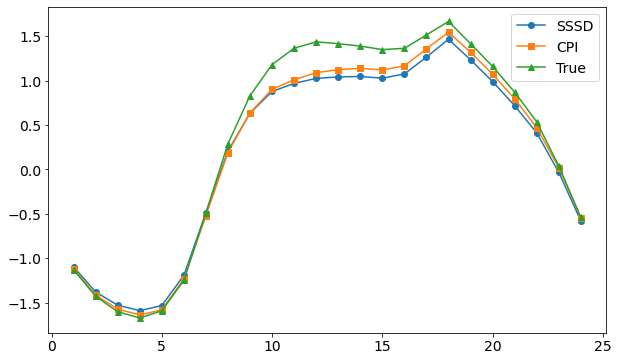

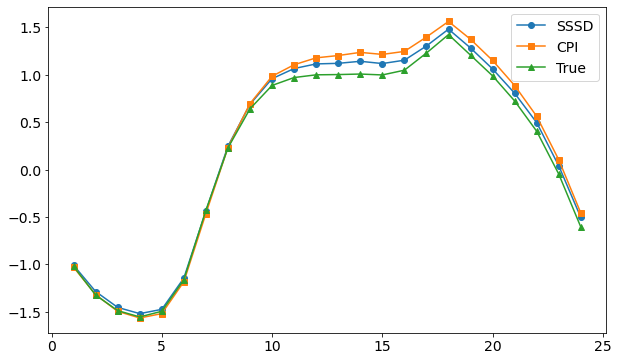

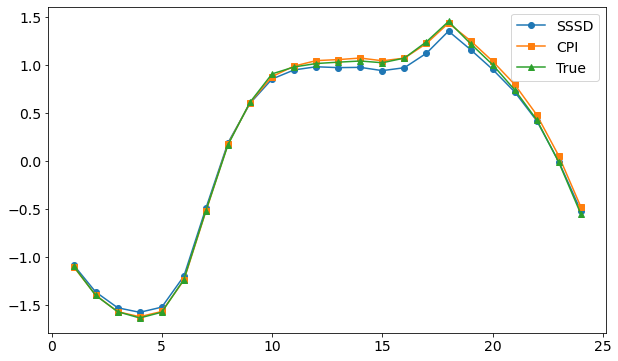

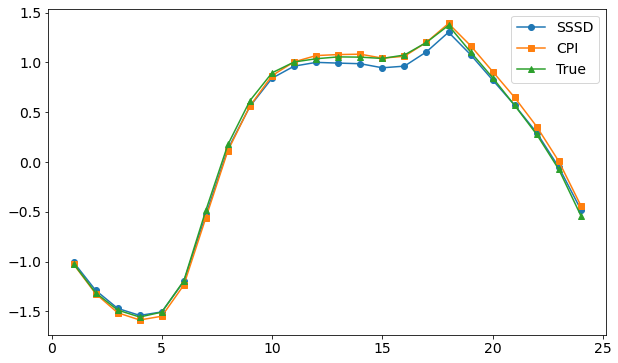

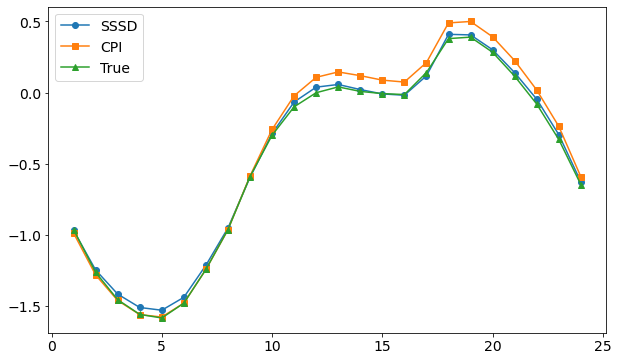

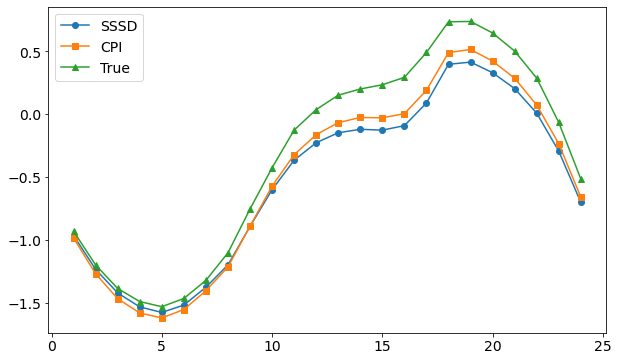

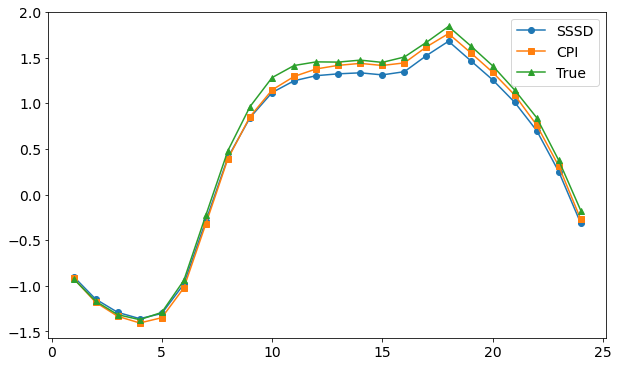

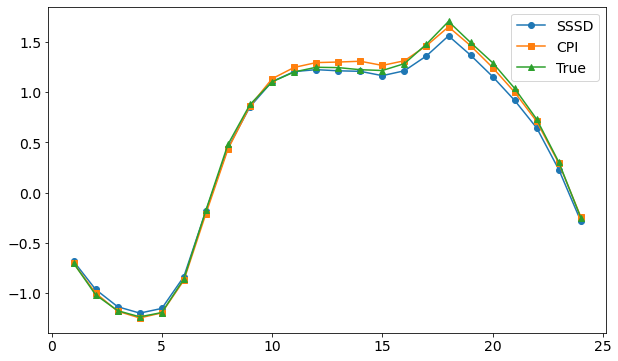

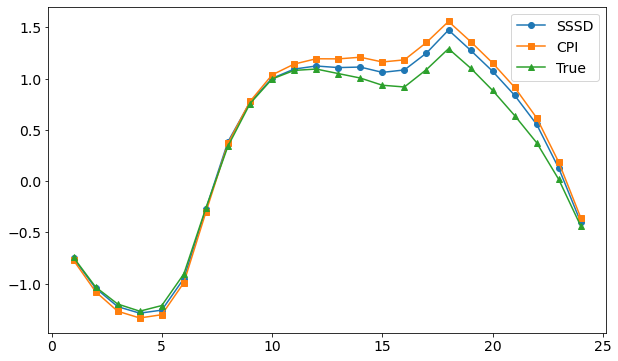

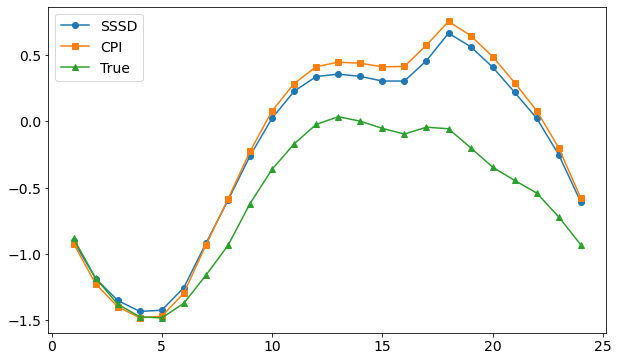

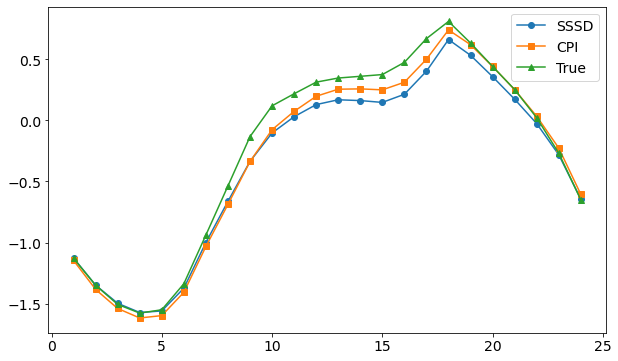

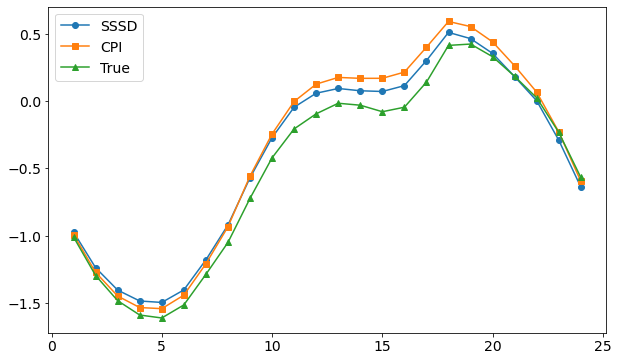

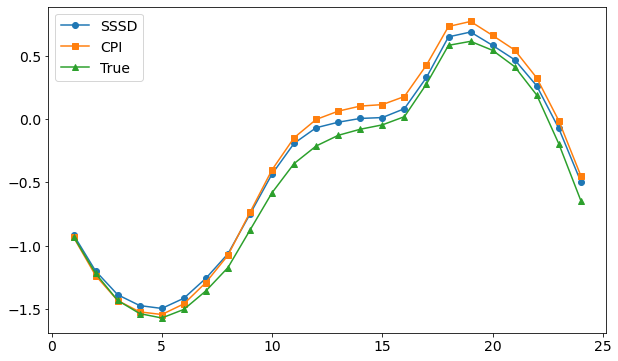

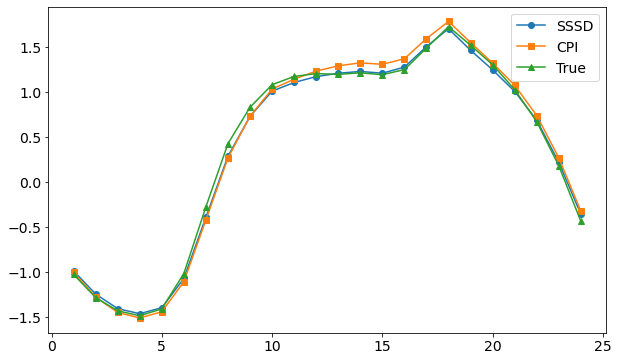

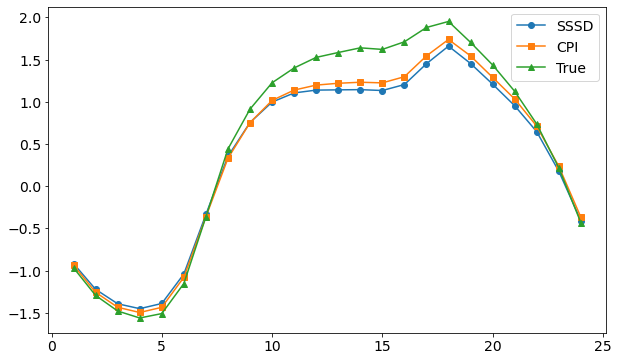

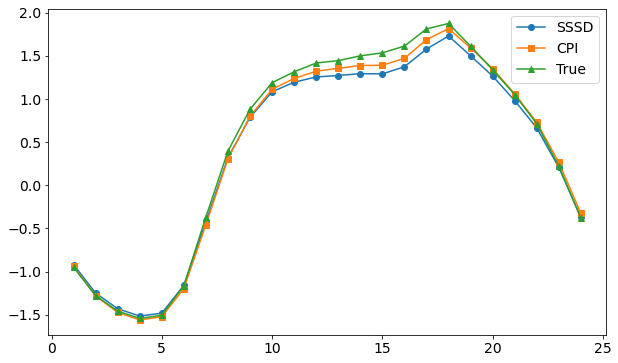

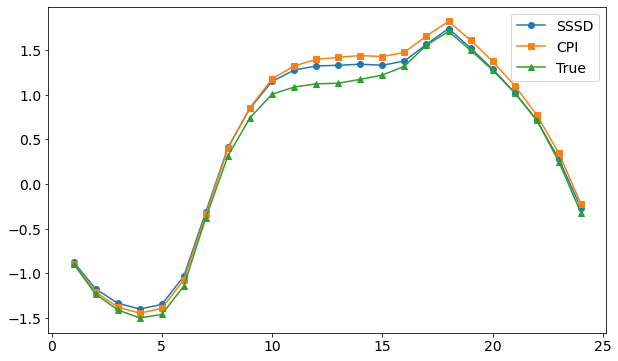

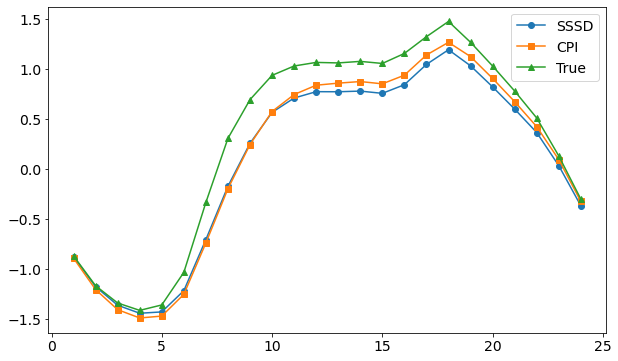

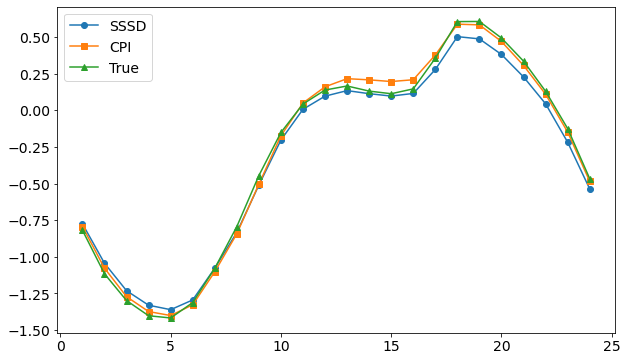

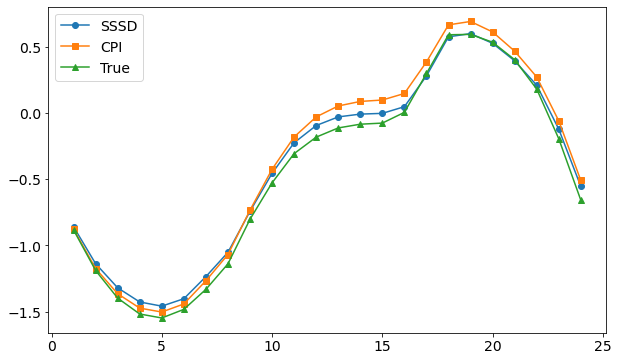

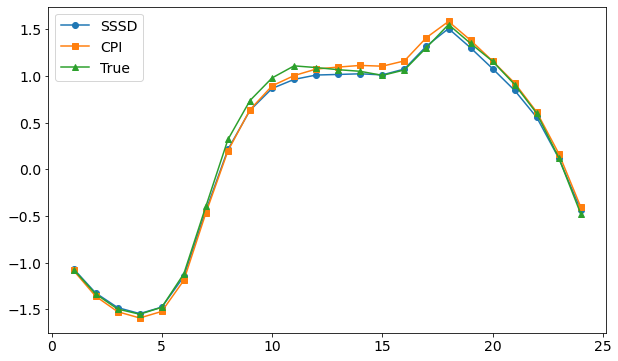

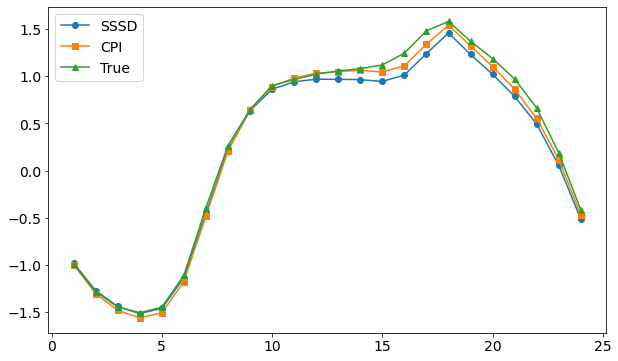

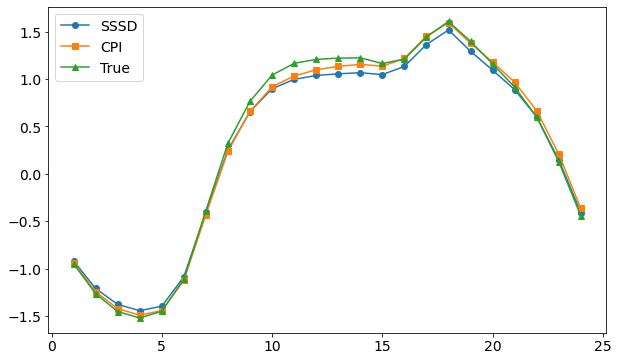

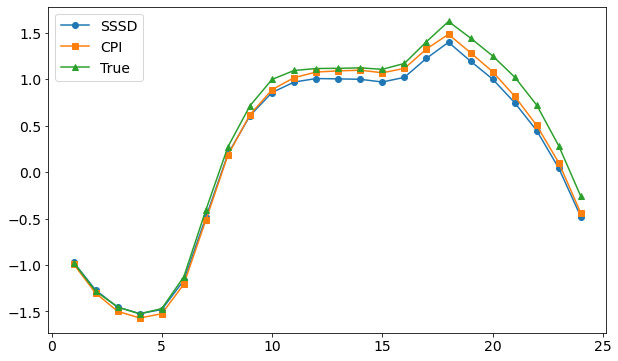

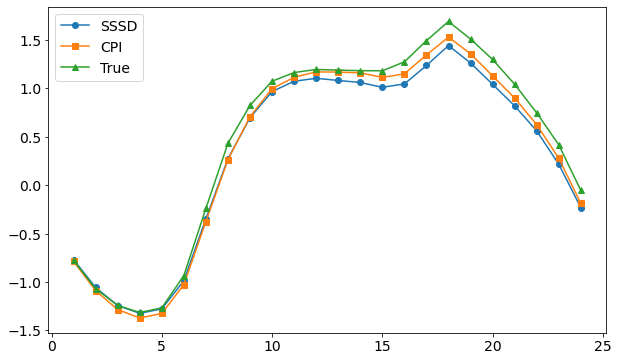

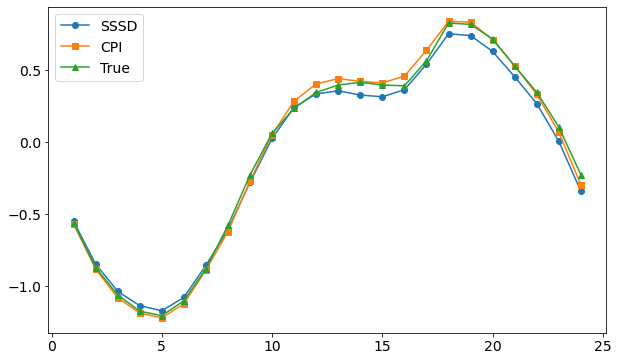

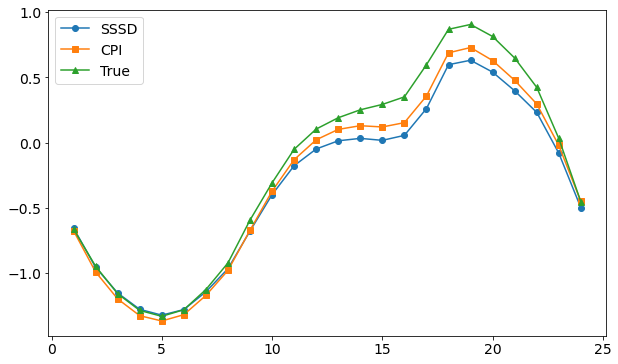

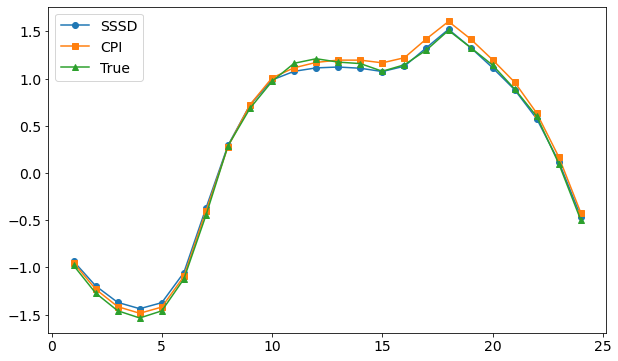

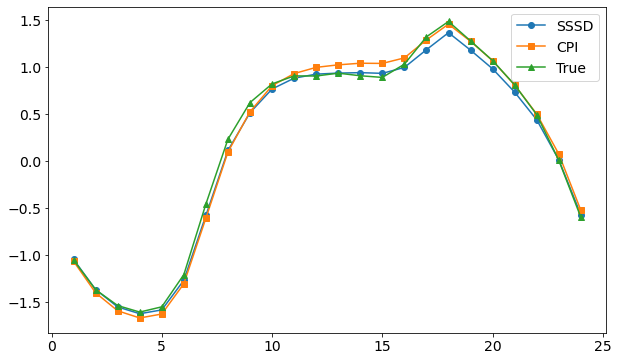

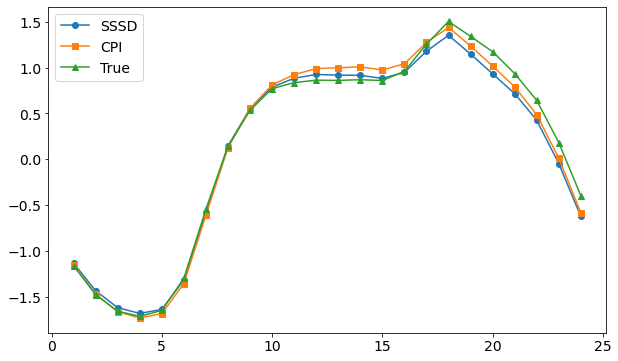

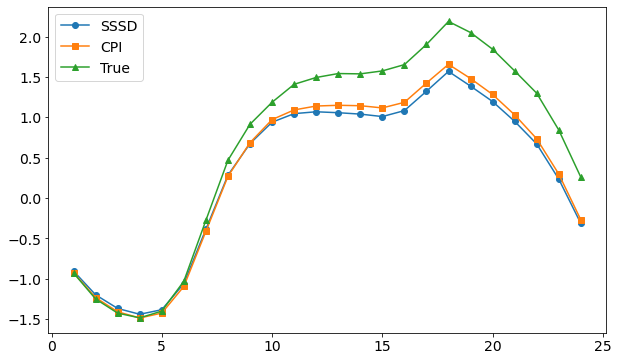

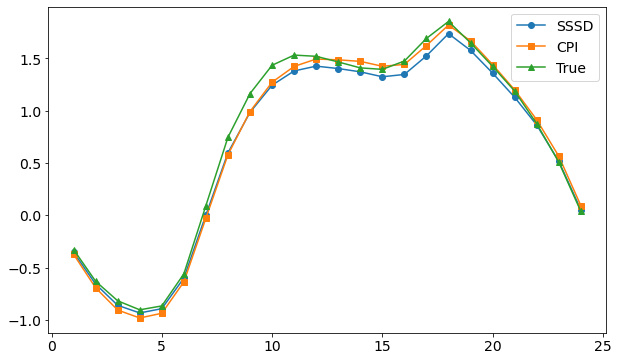

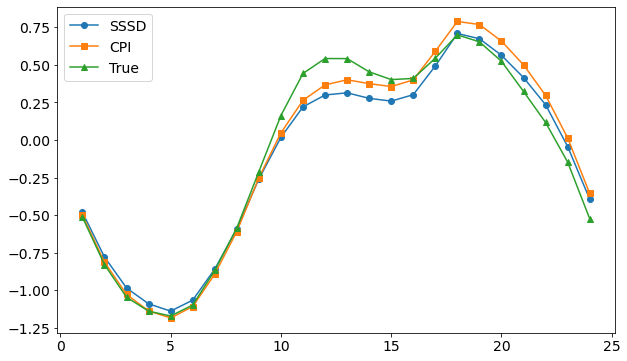

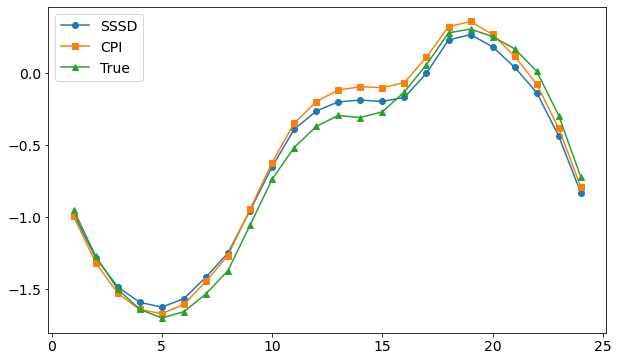

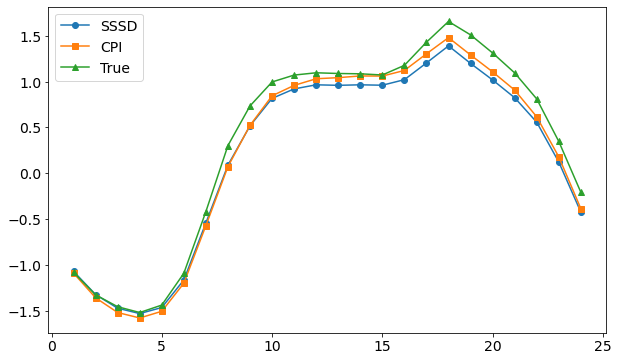

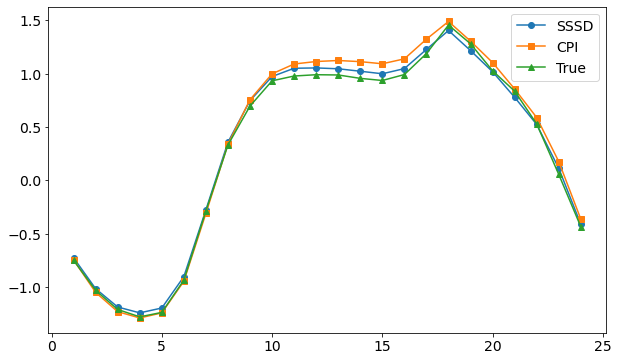

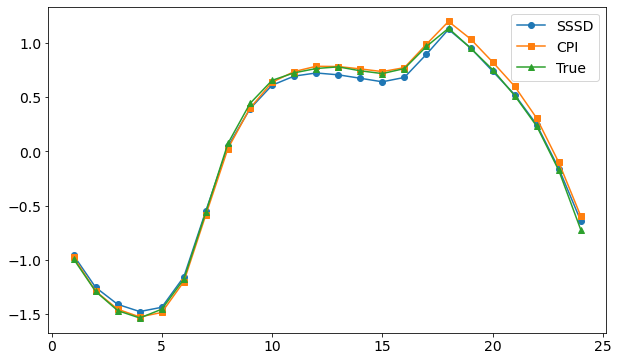

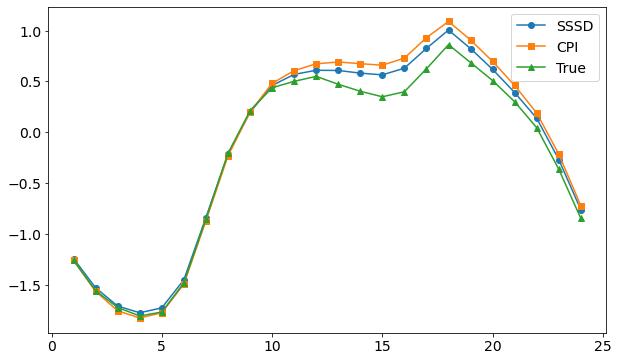

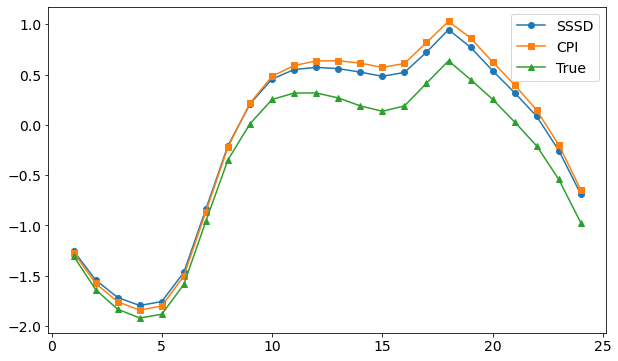

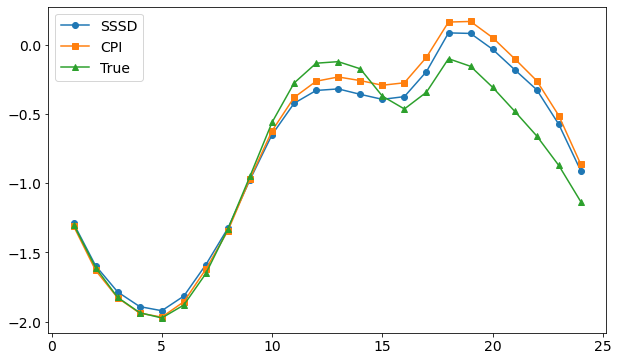

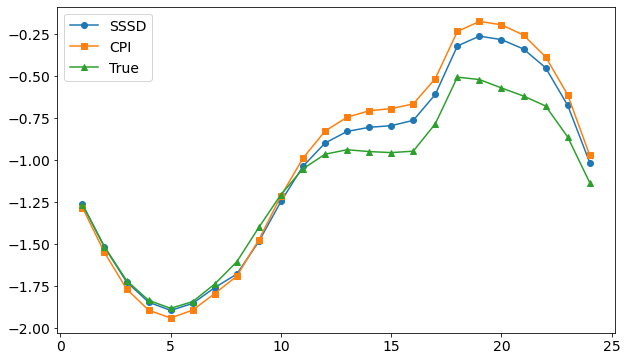

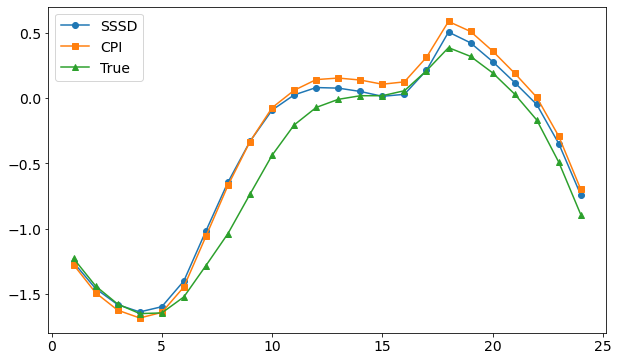

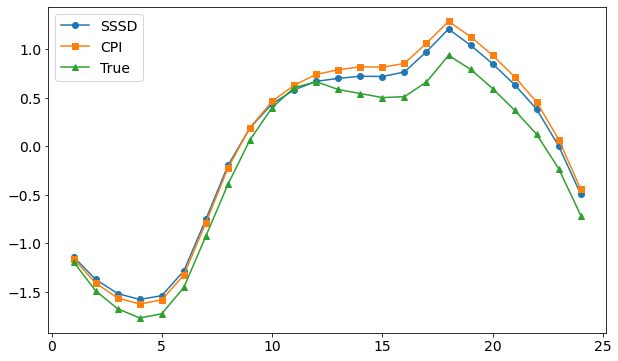

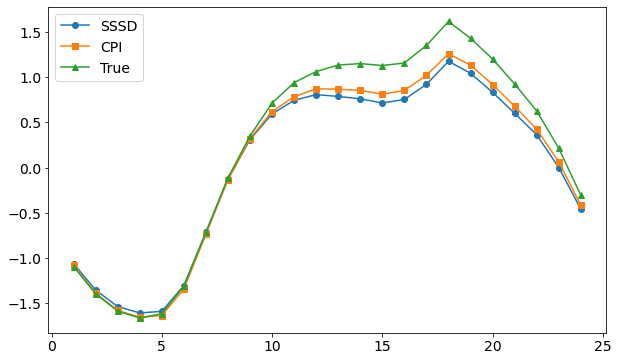

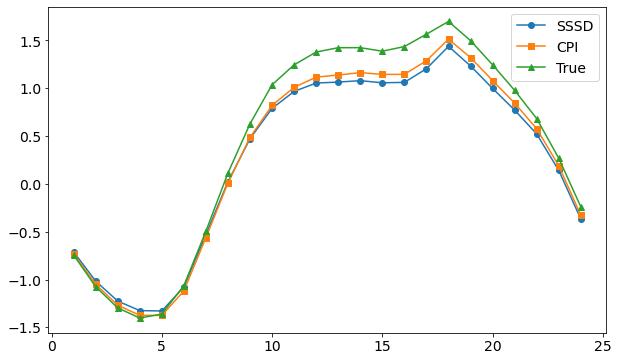

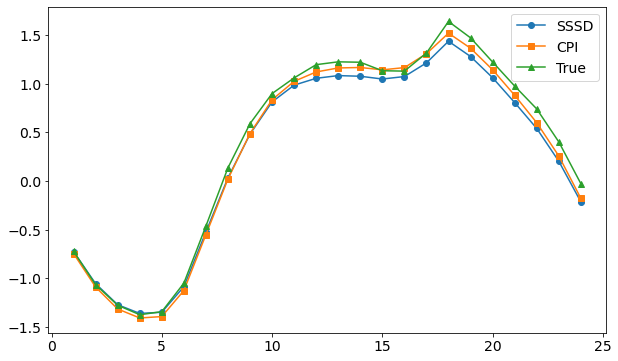

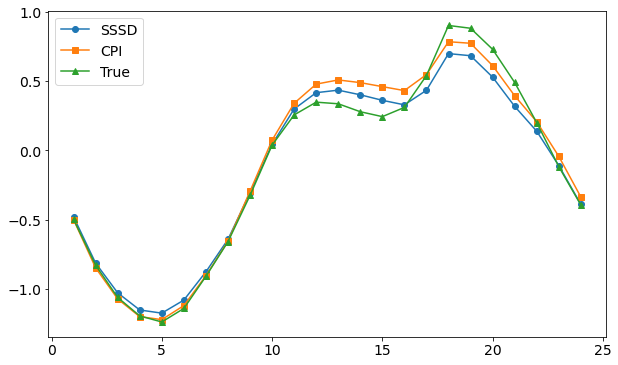

In [66]:
for obs in range(73):


    data1 = pred_mean[obs,:,:].flatten()
    data2 = pred_mean_calibrated[obs,:,:].flatten()
    data3 = true_data_target[obs,:,:].flatten()
    x = np.arange(1, 25)

    plt.figure(figsize=(10, 6))
    plt.plot(x, data1, label='SSSD', marker='o')
    plt.plot(x, data2, label='CPI', marker='s')
    plt.plot(x, data3, label='True', marker='^')
    plt.legend()

# Issue: Use dataset6 as test data
increase test data size from 2016.10.20-2016.12.31 to 2016.10.20-2017.10.19
- compute adjusted PI and compare CR
- compare |error| in boxplot

In [115]:
main_folder_path = "/home/ytfan.st/NA/"
sub_folder_path = "SSSD_CP/src/results/NYISO_4/NYISO_4_NYC_split/T200_beta00.0001_betaT0.02/"
folder_path = main_folder_path + sub_folder_path + "imputaiton_multiple_20k_test_dataset6/"

pred_data_test = read_multiple_imputations(folder_path, 24)
true_data_test = read_missing_k_data(folder_path, npy_file="original0.npy", missing_k = 24)
print(f"pred_data, shape: {pred_data_test.shape}")
print(f"true_data, shape: {true_data_test.shape}")

pred_data, shape: (10, 350, 1, 24)
true_data, shape: (350, 1, 24)


## Issue: compute adjusted PI and compare CR

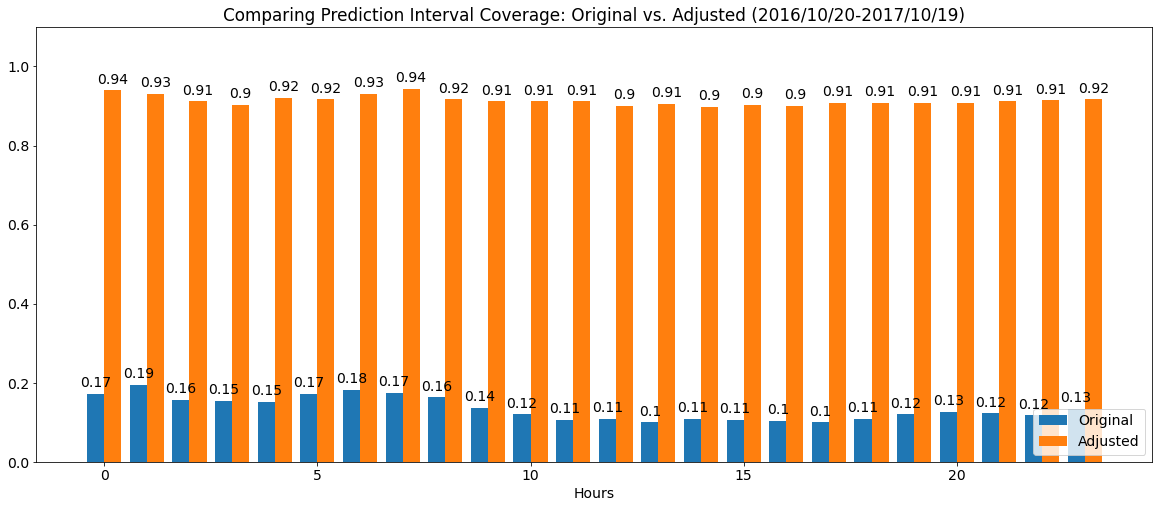

In [96]:
L, U = pred_interval(pred_data_test, beta = 0.05)
L_star, U_star = adjust_PI(L, U, E_star)
test_CR_original = coverage_rate(L, U, true_data_test)
test_CR_adjust = coverage_rate(L_star, U_star, true_data_test)

CR_barchart_compare(test_CR_original[0], test_CR_adjust[0], figure_title = 'Comparing Prediction Interval Coverage: Original vs. Adjusted (2016/10/20-2017/10/19)')


pred_data, shape: (10, 73, 1, 24)
true_data, shape: (73, 1, 24)


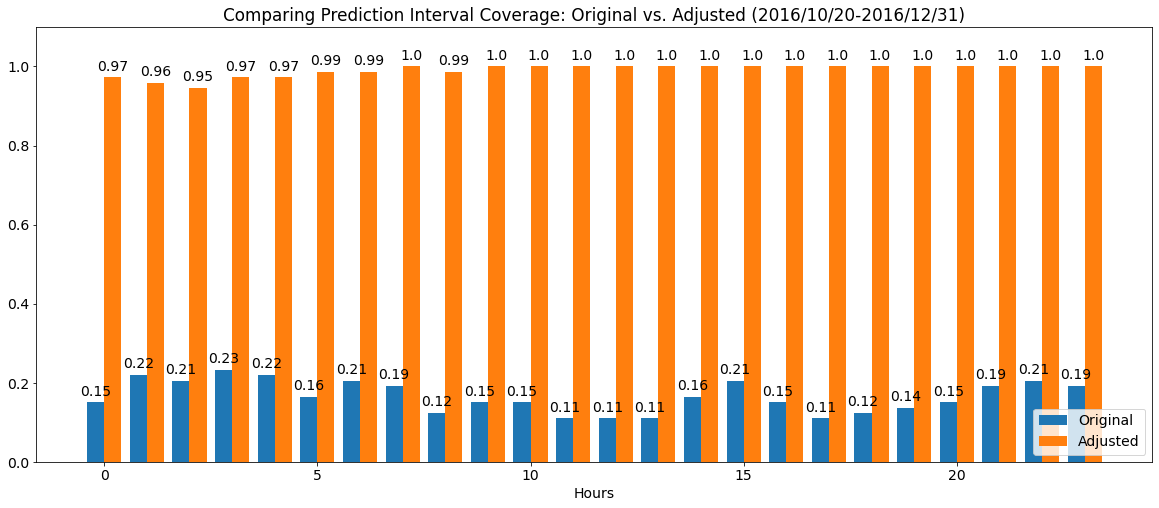

In [97]:
pred_data = pred_data_test[:,0:73,:,:]
true_data = true_data_test[0:73,:,:]

print(f"pred_data, shape: {pred_data.shape}")
print(f"true_data, shape: {true_data.shape}")

L, U = pred_interval(pred_data, beta = 0.05)
L_star, U_star = adjust_PI(L, U, E_star)
test_CR_original = coverage_rate(L, U, true_data)
test_CR_adjust = coverage_rate(L_star, U_star, true_data)

CR_barchart_compare(test_CR_original[0], test_CR_adjust[0], figure_title = 'Comparing Prediction Interval Coverage: Original vs. Adjusted (2016/10/20-2016/12/31)')


pred_data, shape: (10, 276, 1, 24)
true_data, shape: (276, 1, 24)


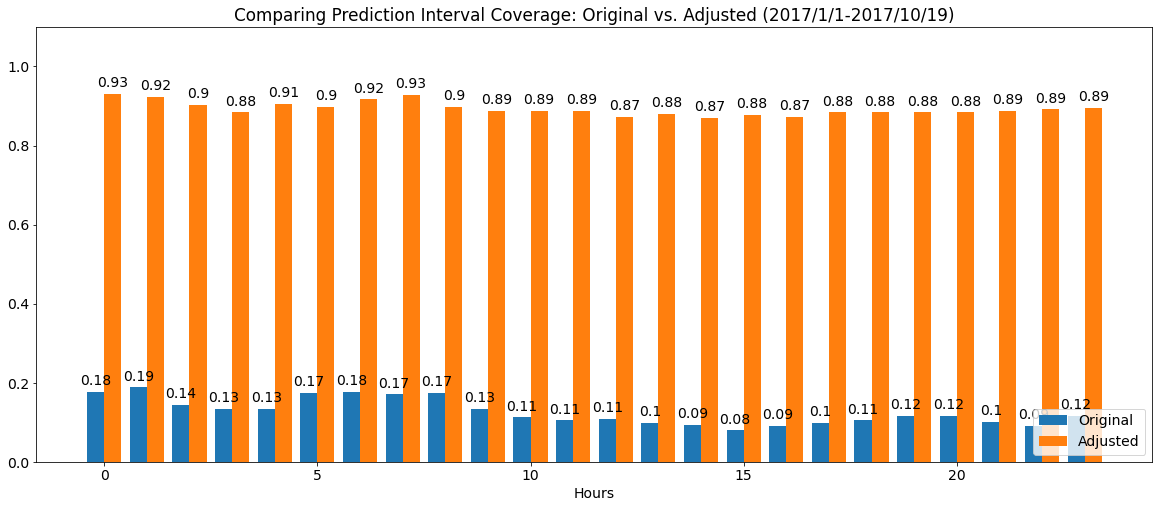

In [98]:

pred_data = pred_data_test[:,74:,:,:]
true_data = true_data_test[74:,:,:]

print(f"pred_data, shape: {pred_data.shape}")
print(f"true_data, shape: {true_data.shape}")

L, U = pred_interval(pred_data, beta = 0.05)
L_star, U_star = adjust_PI(L, U, E_star)
test_CR_original = coverage_rate(L, U, true_data)
test_CR_adjust = coverage_rate(L_star, U_star, true_data)

CR_barchart_compare(test_CR_original[0], test_CR_adjust[0], figure_title = 'Comparing Prediction Interval Coverage: Original vs. Adjusted (2017/1/1-2017/10/19)')

## Issue: compare |error| in boxplot

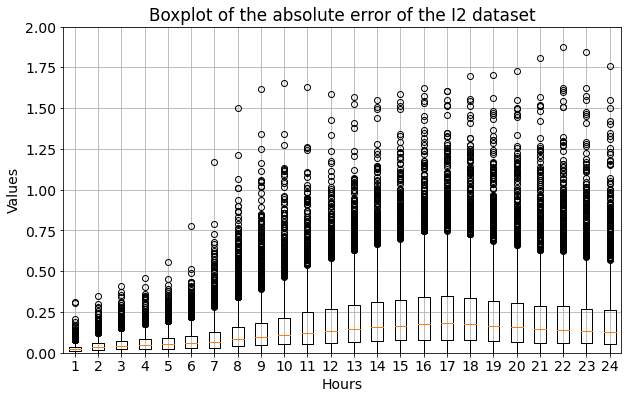

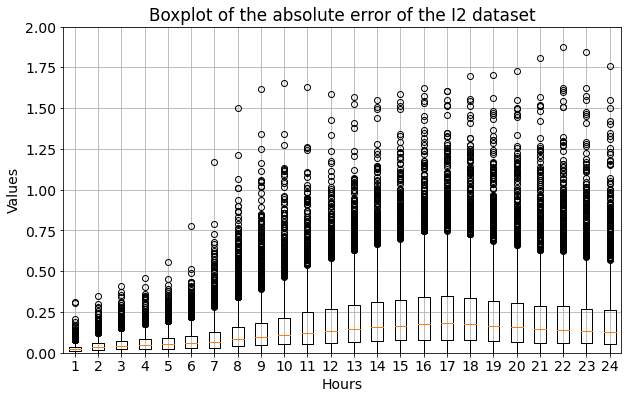

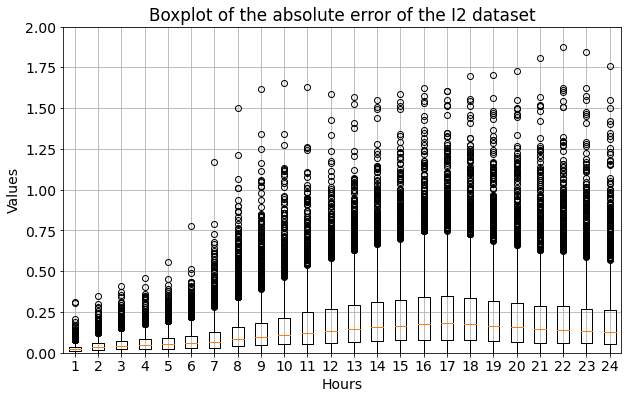

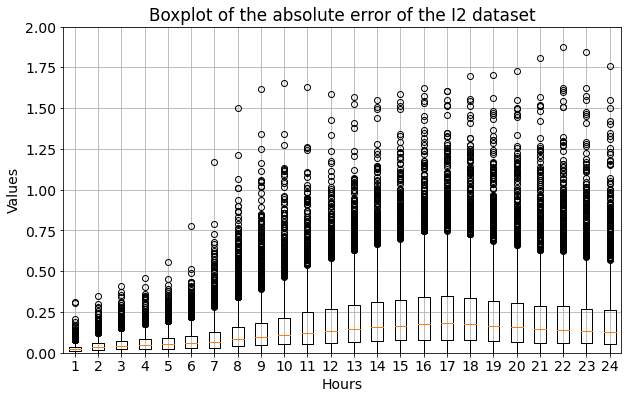

In [99]:
pred_mean_I2 = np.mean(pred_data_I2, axis = 0)
abs_err_I2 = np.absolute(pred_mean_I2 - true_data_I2)
err_boxplot(abs_err_I2, figure_title = 'Boxplot of the absolute error of the I2 dataset')

pred_mean_test = np.mean(pred_data_test, axis = 0)
abs_err_test = np.absolute(pred_mean_test - true_data_test)
err_boxplot(abs_err_test, figure_title = 'Boxplot of the absolute error of the test dataset')
err_boxplot(abs_err_test[0:73], figure_title = 'Boxplot of the absolute error of the test dataset (10/20-12/31)')
err_boxplot(abs_err_test[74:], figure_title = 'Boxplot of the absolute error of the test dataset  (1/1-10/19)')


# compare to AR(1) theoretical interval

In [127]:
# data = np.load('/home/hchuang/Documents/Project/SSSD_CP/src/datasets/AR/test_ar1_1000_3.npy')

In [127]:
def plot_intervals(index, lower_black, upper_black, lower_blue, upper_blue, lower_red, upper_red):
    import matplotlib.pyplot as plt

    # 创建图形和子图
    fig, ax = plt.subplots()
    # 设定 x 轴大小
    ax.set_xlim(-4, 4)  # 设置 x 轴范围为 0 到 10
    ax.set_ylim(0, 2) 
    # 绘制黑色信赖区间
    ax.plot([lower_black, upper_black], [1.5,1.5], color='black', linestyle='-', linewidth=2, label='theoretical')

    # 绘制蓝色信赖区间
    ax.plot([lower_blue, upper_blue], [1,1], color='blue', linestyle='-', linewidth=2, label='SSSD')

    # 绘制红色信赖区间
    ax.plot([lower_red, upper_red], [0.5,0.5], color='red', linestyle='-', linewidth=2, label='conformalized')

    # 设置纵轴刻度为空
    ax.set_yticks([])
    ax.set_yticklabels([])

    # 添加图例
    ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

    # 添加标题
    ax.set_title('Comparison of Prediction Intervals' + str(index))

    # 显示图形
    plt.show()


In [128]:
import os

current_directory = os.getcwd()
print("当前工作目录:", current_directory)

当前工作目录: /home/hchuang/Documents/Project/SSSD_CP/src


In [1]:
# index = 0
# for index in range(100):
#     plot_intervals(index = index,
#                     lower_black = data[index,1,0]*0.8 - 1.96, 
#                     upper_black = data[index,1,0]*0.8 + 1.96, 
#                     lower_blue = L[index,0,0],
#                     upper_blue = U[index,0,0], 
#                     lower_red = L_star[index,0,0], 
#                     upper_red = U_star[index,0,0])

#     # fig.savefig('/home/hchuang/Documents/Project/SSSD_CP/src/results/ar1-6/T200_beta00.0001_betaT0.02/CPI/plot' + str(index) +'.png')  # 可以指定文件名及路径


# Clustering

In [175]:
import matplotlib.pyplot as plt
import numpy as np
import skfda
from skfda import datasets
from skfda.exploratory.visualization.clustering import (
    ClusterMembershipLinesPlot,
    ClusterMembershipPlot,
    ClusterPlot,
)
from skfda.ml.clustering import FuzzyCMeans, KMeans

## Read data

In [68]:
# main_folder_path = "/home/ytfan.st/NA/"
# sub_folder_path = "SSSD_CP/src/results/NYISO_4/NYISO_4_NYC_split/T200_beta00.0001_betaT0.02/"

# # I2 dataset
# pred_data_I2 = np.vstack([read_multiple_imputations(main_folder_path + sub_folder_path + 'imputaiton_multiple_20k_I2_part'+ str(i) +'/', 24) for i in range(3)])
# true_data_I2 = read_missing_k_data(main_folder_path+sub_folder_path, npy_file="imputaiton_multiple_20k_I2_part0/original0.npy", missing_k = 24)

# print(f"pred_data_I2, shape: {pred_data_I2.shape}")
# print(f"true_data_I2, shape: {true_data_I2.shape}")

# pred_data_I2_all = np.vstack([read_multiple_imputations(main_folder_path + sub_folder_path + 'imputaiton_multiple_20k_I2_part'+ str(i) +'/', 192) for i in range(3)])
# print(f"pred_data_I2_all, shape: {pred_data_I2_all.shape}")

# # test dataset
# folder_path = main_folder_path + sub_folder_path + "imputaiton_multiple_20k_test/"

# pred_data_test = read_multiple_imputations(folder_path, 24)
# true_data_test = read_missing_k_data(folder_path, npy_file="original0.npy", missing_k = 24)

# print(f"pred_data_test, shape: {pred_data_test.shape}")
# print(f"true_data_test, shape: {true_data_test.shape}")


# true_data_test_all = read_missing_k_data(folder_path, npy_file="original0.npy", missing_k = 192)
# print(f"true_data_test_all, shape: {true_data_test_all.shape}")

# sub_folder_path = 'SSSD_CP/src/datasets/NYISO/dataset_4/zone_split/I2_N.Y.C._train_stdd.npy'
# true_data_I2_all = np.load(main_folder_path + sub_folder_path)
# true_data_I2_all = np.swapaxes(true_data_I2_all, 1,2)
# print(f"true_data_I2_all, shape: {true_data_I2_all.shape}")

pred_data_I2, shape: (50, 2061, 1, 24)
true_data_I2, shape: (2061, 1, 24)
pred_data_I2_all, shape: (50, 2061, 1, 192)
pred_data_test, shape: (50, 73, 1, 24)
true_data_test, shape: (73, 1, 24)
true_data_test_all, shape: (73, 1, 192)
true_data_I2_all, shape: (2061, 1, 192)


In [176]:
pred_mean_I2 = np.mean(pred_data_I2, axis = 0)
pred_mean_test = np.mean(pred_data_test,axis=0)
print(pred_mean_I2.shape)
print(pred_mean_test.shape)

(2061, 1, 24)
(73, 1, 24)


## 分群

In [177]:
num_cluster = 12

# // apply clustering on the previous 7 days
# data = np.squeeze(true_data_I2_all, axis = 1)
# data_pre = data[:,0:-24] 

# // apply clustering on the predictions
# data = np.squeeze(pred_mean_I2, axis = 1)
# data_pre = data[:,-24:] 

# // appy clustering on the previous 7 days + predictions
data1 = np.squeeze(true_data_I2_all, axis = 1)
data2 = np.squeeze(pred_mean_I2, axis = 1)
data_pre = np.concatenate((data1[:,0:-24], data2[:,-24:]), axis=1)


grid_points = range(data_pre.shape[1])


fd = skfda.FDataGrid(data_pre, grid_points)
model = skfda.ml.clustering.KMeans(n_clusters=num_cluster, random_state=0)
model.fit(fd)
group_center = model.cluster_centers_.data_matrix # (n_clusters, # of length, ?)
group_fd = model.predict(fd)
count_group = np.bincount(group_fd, minlength=num_cluster) 


In [179]:
count_group

array([223,  61, 232,  72,  76, 213, 231,  90, 267, 108, 245, 243])

## 分群結果 plot

In [163]:
# d = np.squeeze(true_data_I2_all, axis = 1)
# print(d.shape)

# for i in range(num_cluster):
#     # 創建一個圖形和軸對象
#     plt.figure(figsize=(8, 4))
#     # 設置繪圖時的字體大小
#     plt.rcParams['font.size'] = 14
#     # 繪製每條時間序列
#     for series in d[group_fd==i,:]:
#         plt.plot(series, linewidth=0.5, alpha=0.8)  # alpha用於設置透明度，以便更好地視覺化重疊

#     # 設置標題和軸標籤
#     plt.title(f'Time Series of Cluster = {i}, Number of Series = {count_group[i]}')
#     plt.xlabel('Time Steps')
#     plt.ylabel('Values')
#     plt.ylim(-3.5,4)

#     # 顯示圖表
#     plt.show()

## Compute E*

### Method 1

In [94]:
L, U = pred_interval(pred_data_I2, beta = 0.05)
E_star_all = compute_E_star(L, U, true_data_I2, alpha = 0.05)

E_star_ls = []
for i in range(num_cluster):
    # print(i)
    pred_data = pred_data_I2[:,group_fd==i,:,:]
    true_data = true_data_I2[group_fd==i,:,:]

    L, U = pred_interval(pred_data, beta = 0.05)
    E_star_ls.append(compute_E_star(L, U, true_data, alpha = 0.05))

E_star_group = np.vstack(E_star_ls)

### Method 2

In [180]:
L, U = pred_interval(pred_data_I2, beta = 0.05)
# E_star_all = compute_E_star(L, U, true_data_I2, alpha = 0.05)
E_star_all_L, E_star_all_U = compute_E_star_separate(L, U, true_data_I2, alpha = 0.05)

E_star_ls_L = []; E_star_ls_U = []
for i in range(num_cluster):
    # print(i)
    pred_data = pred_data_I2[:,group_fd==i,:,:]
    true_data = true_data_I2[group_fd==i,:,:]

    L, U = pred_interval(pred_data, beta = 0.05)
    # E_star_ls.append(compute_E_star(L, U, true_data, alpha = 0.05))
    E_star_L, E_star_U = compute_E_star_separate(L, U, true_data, alpha = 0.05)
    E_star_ls_L.append(E_star_L)
    E_star_ls_U.append(E_star_U)

# E_star_group = np.vstack(E_star_ls)
E_star_group_L = np.vstack(E_star_ls_L)
E_star_group_U = np.vstack(E_star_ls_U)

## 測試資料分群

In [181]:
# // apply clustering on the previous 7 days
# data = np.squeeze(true_data_test_all, axis = 1)
# data_pre = data[:,0:-24] 

# // apply clustering on the predictions
# data = np.squeeze(pred_mean_test, axis = 1)
# data_pre = data[:,-24:] 

# // apply clustering on the previous 7 days + the predictions
data1 = np.squeeze(true_data_test_all, axis = 1)
data2 = np.squeeze(pred_mean_test, axis = 1)
data_pre = np.concatenate((data1[:,0:-24], data2[:,-24:]), axis=1)

grid_points = range(data_pre.shape[1])

fd = skfda.FDataGrid(data_pre, grid_points)
group_fd = model.predict(fd) 
count_group = np.bincount(group_fd, minlength=num_cluster)  # minlength 确保数组长度至少为num_cluster，即使某些数字没有出现
count_group

array([ 7,  0,  7,  3,  2,  9,  9,  3, 11,  5,  8,  9])

## Adjust PI for each group

### Method 1

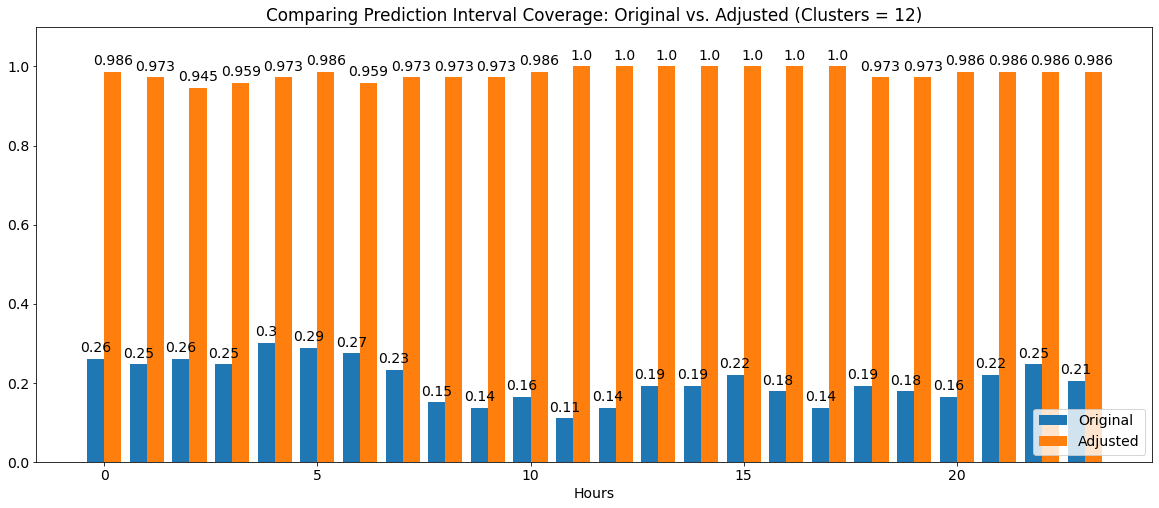

In [182]:
true_data_ls = []
L_ls = []
U_ls = []
L_star_ls = []
U_star_ls = []

for i in range(num_cluster):
    pred_data = pred_data_test[:,group_fd==i,:,:]
    true_data = true_data_test[group_fd==i,:,:]

    L, U = pred_interval(pred_data, beta = 0.05)
    L_star, U_star = adjust_PI(L, U, E_star_ls[i])

    true_data_ls.append(true_data)
    L_ls.append(L)
    U_ls.append(U)
    L_star_ls.append(L_star)
    U_star_ls.append(U_star)



test_CR_original = coverage_rate(np.vstack(L_ls), np.vstack(U_ls), np.vstack(true_data_ls))
test_CR_adjust = coverage_rate(np.vstack(L_star_ls), np.vstack(U_star_ls), np.vstack(true_data_ls))

CR_barchart_compare(test_CR_original[0], test_CR_adjust[0], 
                    figure_title = f'Comparing Prediction Interval Coverage: Original vs. Adjusted (Clusters = {num_cluster})')


### Method 2

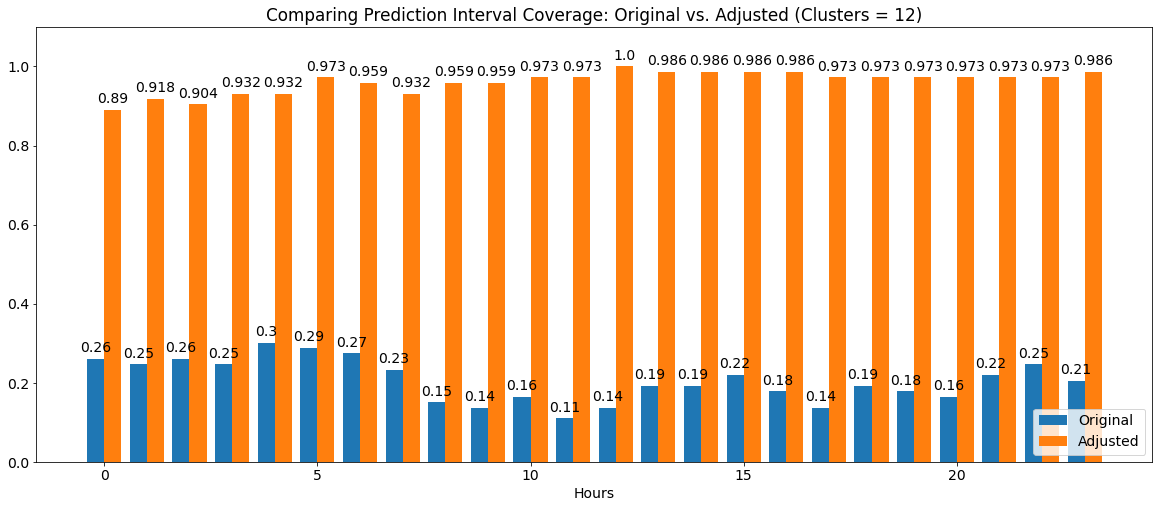

In [183]:
true_data_ls = []
L_ls = []
U_ls = []
L_star_ls = []
U_star_ls = []

pred_mean_calibrated = np.zeros(true_data_test.shape)

for i in range(num_cluster):
    pred_data = pred_data_test[:,group_fd==i,:,:]
    true_data = true_data_test[group_fd==i,:,:]

    L, U = pred_interval(pred_data, beta = 0.05)
    # L_star, U_star = adjust_PI(L, U, E_star_ls[i])
    L_star, U_star = adjust_PI_separate(L, U, E_star_ls_L[i], E_star_ls_U[i])


    true_data_ls.append(true_data)
    L_ls.append(L)
    U_ls.append(U)
    L_star_ls.append(L_star)
    U_star_ls.append(U_star)

    pred_mean_calibrated[group_fd==i,:,:] = (L_star + U_star)/2 # L_star & U_star are from Method 2



test_CR_original = coverage_rate(np.vstack(L_ls), np.vstack(U_ls), np.vstack(true_data_ls))
test_CR_adjust = coverage_rate(np.vstack(L_star_ls), np.vstack(U_star_ls), np.vstack(true_data_ls))

CR_barchart_compare(test_CR_original[0], test_CR_adjust[0], 
                    figure_title = f'Comparing Prediction Interval Coverage: Original vs. Adjusted (Clusters = {num_cluster})')


## method 2 的 MAPE

In [184]:
pred_mean_o = pred_mean_calibrated*s + m
pred_medain_o = pred_mean_calibrated*s + m

print(pred_mean_o.shape)

print(f'median MAPE: {round(np.mean(abs((true_data_o_target - pred_medain_o))/true_data_o_target)*100,4)}')
print(f'MAPE: {round(np.mean(abs((true_data_o_target - pred_mean_o))/true_data_o_target)*100,4)}')
print(f'MSE: {round(np.mean(np.square(true_data_target - pred_mean_calibrated))*1,4)}')

(73, 1, 24)
median MAPE: 1.6713
MAPE: 1.6713
MSE: 0.0271


## 比較分群後 E* 結果

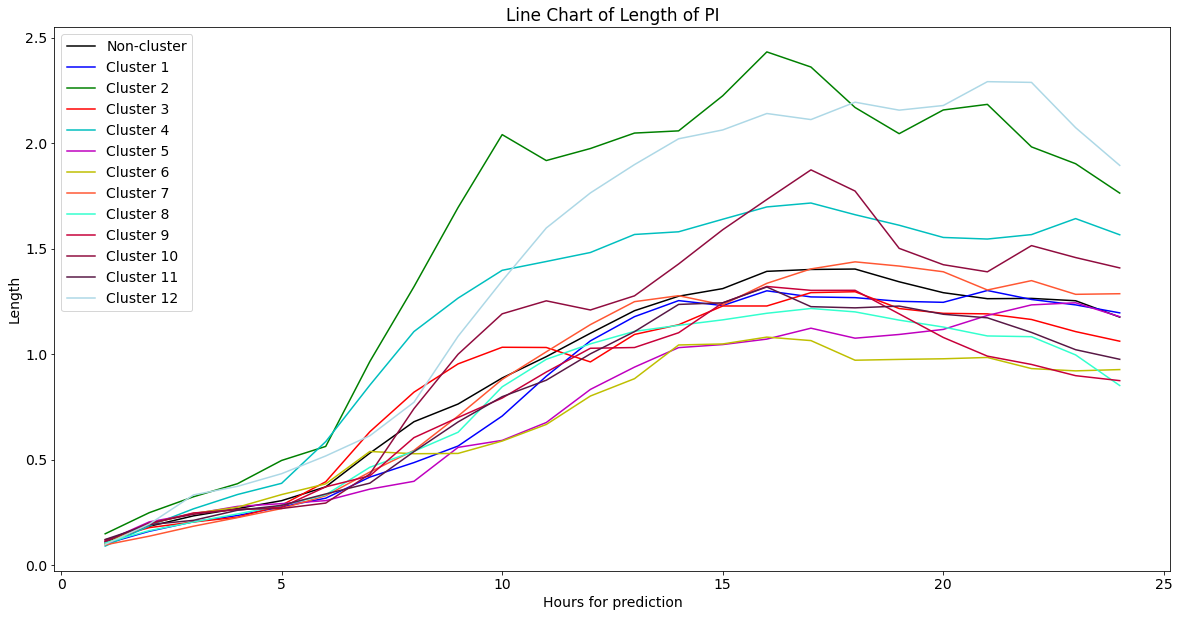

In [234]:
# 資料
data = np.vstack([E_star_all, E_star_group])
data = 2*data # length of PI

# 設定 x 軸的數據點
x_points = np.arange(1, 25)  # 生成一個從1到24的數組

# 定義顏色列表，這裡列出了 20 種不同的顏色，你可以根據需要更改
colors = [
    'k', 'b', 'g', 'r', 'c', 'm', 'y',  # 基本顏色
    '#FF5733', '#33FFCE', '#C70039', '#900C3F', '#581845',  # HEX code顏色
    'lightblue', 'lightgreen', 'crimson', 'orange', 'purple', 'brown', 'pink', 'gray'
]

# 設置繪圖時的字體大小
plt.rcParams['font.size'] = 14
# 創建圖表
plt.figure(figsize=(20, 10))

# 繪製每條線
for i in range(data.shape[0]):
    if i == 0:
        plt.plot(x_points, data[i], label=f'Non-cluster', color=colors[i % len(colors)]) 
    else:
        plt.plot(x_points, data[i], label=f'Cluster {i}', color=colors[i % len(colors)]) 


# 添加圖例
plt.legend(loc = 'upper left')

# 添加標題和軸標籤
plt.title('Line Chart of Length of PI')
plt.xlabel('Hours for prediction')
plt.ylabel('Length')

# 顯示圖表
plt.show()


In [235]:
# compare E_star_all and E_star_group
print(f'未分群 E_star {E_star_all.shape}')
print(f'分群後 E_star {E_star_group.shape}')


未分群 E_star (1, 24)
分群後 E_star (12, 24)


In [237]:
E_star_smaller = E_star_group < E_star_all
print(f'每一組有幾個時間點 E_star 變小: {np.sum(E_star_smaller, axis = 1)}')
print(f'24個時間點中，有幾組的 E_star 變小:{np.sum(E_star_smaller, axis = 0)}')
print(f'{73*24} 個時間點中，有 {np.sum(count_group * np.sum(E_star_smaller, axis = 1))} 個 E* 變小')

每一組有幾個時間點 E_star 變小: [22  0 17  1 19 18 12 24 20  4 22  1]
24個時間點中，有幾組的 E_star 變小:[6 4 5 7 8 6 7 7 7 7 6 7 7 7 8 8 7 7 7 7 6 7 7 5]
1752 個時間點中，有 1312 個 E* 變小


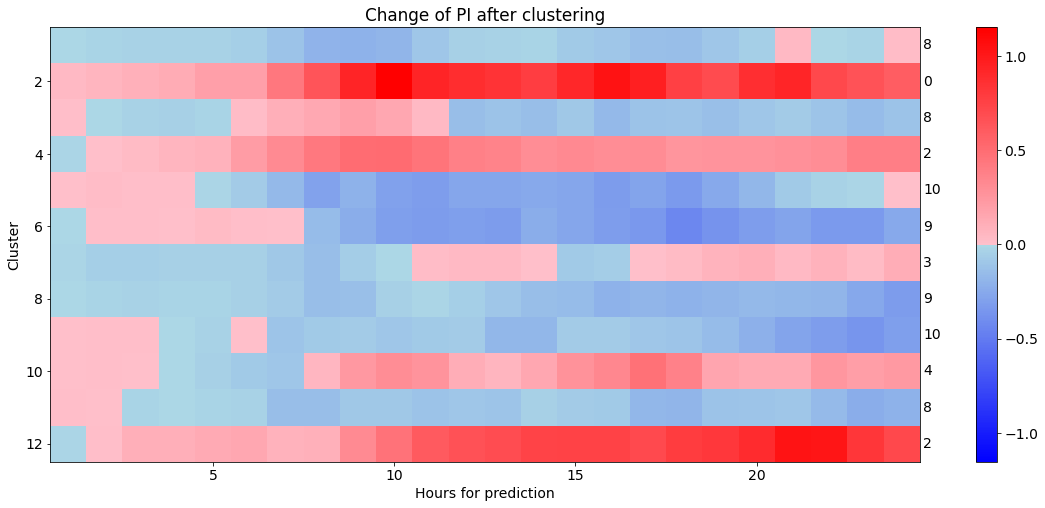

In [238]:
# Change of PI after clustering
E_star_diff = E_star_group - E_star_all

from matplotlib.colors import LinearSegmentedColormap
data = 2*E_star_diff
# 创建自定义颜色映射
# colors = [(0, 'blue'), (0.5, 'white'), (1, 'red')]  # (value, color) pairs
colors = [(0, 'blue'), (0.499, 'lightblue'), (0.501, 'pink'),  (1, 'red')]  # (value, color) pairs
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)
# 設置繪圖時的字體大小
plt.rcParams['font.size'] = 14

# 创建热力图
fig, ax = plt.subplots(figsize=(20, 8))
cax = ax.imshow(data, cmap=cmap, interpolation='nearest', extent=[0.5, 24.5, 12.5, 0.5], vmin=-np.max(np.abs(data)), vmax=np.max(np.abs(data)))
# 设置vmin和vmax来确保颜色映射正确显示
plt.colorbar(cax)  # 添加颜色条
ax.set_title('Change of PI after clustering')
ax.set_xlabel('Hours for prediction')
ax.set_ylabel('Cluster')
# 添加右側的數字標記
hours_labels = count_group  # 假設每個Cluster對應一個小時數
for i, label in enumerate(hours_labels):
    ax.text(24.6, i + 1, str(label), va='center', ha='left')

plt.show()

## 測試資料分群結果 plot

In [99]:
# d = np.squeeze(true_data_test_all, axis = 1)
# print(d.shape)

# for i in range(num_cluster):
#     # 創建一個圖形和軸對象
#     plt.figure(figsize=(8, 4))
#     # 設置繪圖時的字體大小
#     plt.rcParams['font.size'] = 14
#     # 繪製每條時間序列
#     for series in d[group_fd==i,:]:
#         plt.plot(series, linewidth=0.5, alpha=0.8)  # alpha用於設置透明度，以便更好地視覺化重疊

#     # 設置標題和軸標籤
#     plt.title(f'Time Series of Cluster = {i}, Number of Series = {count_group[i]}')
#     plt.xlabel('Time Steps')
#     plt.ylabel('Values')

#     # 顯示圖表
#     plt.show()

## 哪些 PI 沒有包含 test data

In [38]:
test_CR_adjust = coverage_rate(np.vstack(L_star_ls), np.vstack(U_star_ls), np.vstack(true_data_ls))
test_CR_adjust

array([[0.98630137, 0.97260274, 0.94520548, 0.95890411, 0.97260274,
        0.98630137, 0.95890411, 0.97260274, 0.97260274, 0.98630137,
        0.98630137, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.97260274, 0.97260274,
        0.98630137, 0.98630137, 0.98630137, 0.98630137]])

In [45]:
# 找出 73 中哪些沒有被 PI 包含

# 創造 (73,192,1) test data into group
print(data.shape)
for i in range(num_cluster):
    data_ls = data[group_fd==i,:,:]

# convert list to array
L_star_group = np.vstack(L_star_ls)
U_star_group = np.vstack(U_star_ls)
true_data_group = np.vstack(true_data_ls)
data_group = np.vstack(data_ls)

